<font color='DarkBlue' size=+2><b>Комментарий ревьюера</b></font><br>
<font color='DarkBlue'>Привет, Диана! <br>Меня зовут Олег Мазуренко, и я буду проверять этот проект. Спасибо за проделанную работу! <br>Ко мне можно обращаться на «ты». Как мне обращаться, напиши.</font><br>
<font color='DarkBlue'>Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</font><br>
<font color='DarkBlue'>Синий текст &mdash; просто текст комментария.</font><br>
<font color='DarkGreen'>👌 Зеленый текст &mdash; все отлично.</font><br>
<font color='DarkMagenta'>👉 Фиолетовый текст &mdash; сделано все правильно, однако есть рекомендации, на что стоит обратить внимание. Реализованные рекомендации позволят нам наработать опыт решения задачи разными способами или посмотреть на задачу под иным углом.</font><br>
<font color='Red'>🛠 Красный текст &mdash; есть недочеты, они иногда бывают. </font><br><font color='DarkBlue'>Любая ошибка это возможность посмотреть на задачу с другой стороны и освоить новые знания, по этому не надо расстраиваться, если они есть.</font><br>
<font color='DarkBlue'>Обращаю внимание, что комментарии ревьюера после проверки удалять нельзя они помогают отследить логику исправления или изменения проекта. Это дополнительный навык при обучении. Свой исправляемый код лучше тоже не удалять, а ремить #, это позволит акцентировать изменения в ходе подготовки окончательного варианта проекта.<br>
Ответы на мои комментарии лучше тоже помечать. 
Например: </font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='DarkBlue'><b>Теперь посмотрим, что у нас получилось!</b></font>

**Сборный проект: прогнозирование потенциально популярного продукта в интернет-магазине "Стримчик"**

**Описание проекта**

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

**Цель проекта:**

Нам необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Описание данных**

| <!-- -->  | <!-- -->  |
|----------|:---------|
| Name | название игры |
| Platform | платформа |
| Year_of_Release | год выпуска |
| Genre | жанр игры |
| NA_sales | продажи в Северной Америке (миллионы проданных копий) |
| EU_sales | продажи в Европе (миллионы проданных копий) |
| JP_sales | продажи в Японии (миллионы проданных копий) |
| Other_sales | продажи в других странах (миллионы проданных копий) |
| Critic_Score | оценка критиков (максимум 100) |
| User_Score | оценка пользователей (максимум 10) |
| Rating | рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. |


**Рейтинг рассчитывается следующим образом:**

| <!-- -->  | <!-- -->  |
|----------|:---------|
|EC («Early childhood») | «Для детей младшего возраста».|
|E («Everyone») | «Для всех».|
|E10+ («Everyone 10 and older») | «Для всех старше 10 лет».|
|T («Teen») | «Подросткам 13–19 лет».|
|M («Mature») | «От 17 лет».|
|AO («Adults Only 18+») | «Только для взрослых».|
|RP ( «Rating Pending») | «Рейтинг ожидается».|
|K-A: Для детей | для тех, кто уже научился говорить и держать джойстик, эти игры уже могут вызывать интерес |

<font color='DarkBlue'><b>Комментарий ревьюера 0</b></font><br>
<font color='DarkGreen'>👌 Хорошо, сделано описание проекта. 👍</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Исходя из полученных данных, можно сделать вывод, что столбец `User_Score` имеет тип данных `object`, хотя должен иметь численный. Разберемся, что на это влияет

In [4]:
data.columns = [x.lower() for x in data.columns]

<font color='DarkBlue'><b>Комментарий ревьюера 0</b></font><br>
<font color='DarkGreen'>👌 Хорошо! Приводим названия колонок к общепринятому стилю. 😉 <br>
А можно просто методом вот так:</font><br>
`df.columns = df.columns.str.lower()`

In [5]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце `User_score` замечено значение `tbd`. 

Аббервиатура `tbd` означает, что игра еще не оценена достаточным количеством пользователей. Расшифровывается с ангилийского `to be defined`

In [6]:
data[data['user_score']=='tbd']['user_score'].count() / len(data['name'])*100

14.501944361352079

В столбце имеется оценка `tbd` не описанная в полученных данных, при этом ее значение больше 14%. Игнорировать это нельзя обозначим как `-1`

In [7]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = -2
data['user_score'].value_counts() 

-2     2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.6       2
0.2       2
0.7       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

<font color='DarkBlue'><b>Комментарий ревьюера 0</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что заменили 'tbd' на заглушку. Только почему пишем -1, а ставим -2?</font>
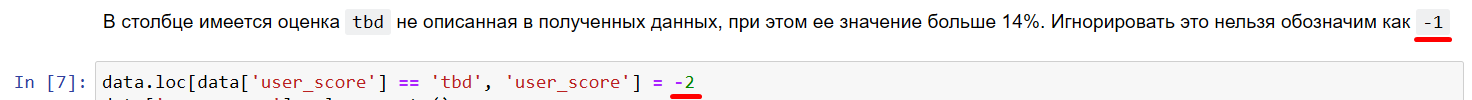

<font color='DarkBlue'><b>Комментарий ревьюера 0: Глоссарий</b></font><br>
<font color='DarkGreen'>👌 В контексте анализа и предобработки датасета часто используютется термин: <b>Заглушка</b>. <br>Из словаря: "Заглушка — приспособление для закрывания отверстия наглухо." <br>В нашем контексте закрытие пропуска в датасете каким-то значением, совпадающим по типу с данными колонки таблицы. Как правило, для числовых данных заглушка должна быть вне диапазона значений колонки. При анализе по данной колонке заглушка или фильтруется, или включается в анализ, если сам пропуск не является ошибкой сбора данных и несет какой-то признак. <br>Частая ошибка, когда заглушке присваивается числовое значение, например `0`, а в данных колонки присутствуют символьные значения `'0'`, то при преобразовании к числовому типу произойдет слияние значимых данных таблицы и заглушки.</font>

In [8]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**Работа с пропусками**

Пропуски могли возникнуть по многим причинам, например: невелся опрос с оценкой игры, игра не популярна и ее никто не оценивал, техничская ошибка и прочее

In [9]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Заметим, что в столбцах `name` и `genre` всего по два пропуска. Посмотрим на них

In [10]:
data[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Исходя из этих данных можно сделать вывод, что от этих строк можно изавиться, так как в них слишком много пропусков, а отсутствие двух строк сильно не повлияет на выборку.

In [11]:
print(len(data))
data.dropna(subset=['name'], inplace=True)
print(len(data))

16715
16713


<font color='DarkBlue'><b>Комментарий ревьюера 0</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что удалили пропуски в названии игр, тем более в этих строках еще хватает пропусков по другим колонкам.</font>

Теперь рассмотрим столбец `year_of_release`. Как было замечено ранее в нем 269 пропусков.

In [12]:
data['year_of_release'].describe()

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

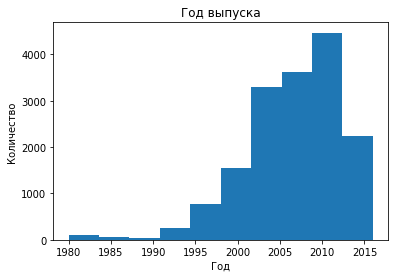

In [13]:
plt.hist(data['year_of_release'])
plt.title('Год выпуска')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()

Так как в основном игры выпускались в последние годы, то логичнее заполнить пропуски медианой

In [14]:
# data['year_of_release'].fillna(data['year_of_release'].median(), inplace=True)

<font color='DarkBlue'><b>Комментарий ревьюера 0</b></font><br>
<font color='Red'>🛠 Зачем получать медианную "температуру по больнице" по пропускам года релиза. Кроме того, каждая платформа имеет срок жизни на рынке, сделав такую замену в датасете появляются игры на платформе, которой в данный год уже не было. Пропусков всего 1,6%, удалить их и забыть.</font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>
Удаляем пропуски в столбце `year_of_release`

In [15]:
data.dropna(subset=['year_of_release'], inplace=True)
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Заменим тип данных в столбце `year_of_release` на `int`

In [16]:
data['year_of_release'] = data['year_of_release'].astype('int')

<font color='DarkBlue'><b>Комментарий ревьюера 0</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что перевели тип данных по году выпуска игр. 👍</font>

Теперь рассмотрим столбец `critic_score`. Как было замечено ранее в нем 8578 пропусков.

Пропусков в `critic_score` слишком много, поэтому заменим их на `-1`

In [17]:
data['critic_score'] = data['critic_score'].fillna(-1)

In [18]:
data['critic_score'].describe()

count    16444.000000
mean        32.979871
std         36.302947
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         70.000000
max         98.000000
Name: critic_score, dtype: float64

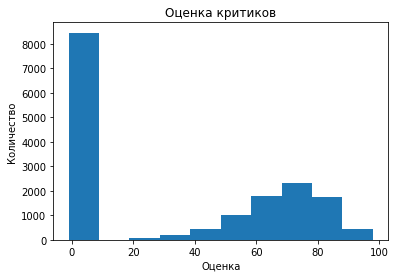

In [19]:
plt.hist(data['critic_score'])
plt.title('Оценка критиков')
plt.xlabel('Оценка')
plt.ylabel('Количество')
plt.show()

Также можно заметить, что оценки критиков - это целые числа, поэтому поменяем тип данных с `float` на `int`

In [20]:
data['critic_score'] = data['critic_score'].astype('int')

Теперь рассмотрим столбец `user_score`. Как было замечено ранее в нем 9125 пропусков.

Так как столбец `user_score` имеет тип данных `object`, поэтому заменим его на тип данных `float`

In [21]:
data['user_score'] = data['user_score'].astype('float')
data['user_score'].describe()

count    9839.000000
mean        4.922431
std         4.118644
min        -2.000000
25%         2.400000
50%         6.900000
75%         8.000000
max         9.700000
Name: user_score, dtype: float64

Количество пропусков в столбце `user_score` очень велико, поэтому пометим их как `-1`

In [22]:
data['user_score'] = data['user_score'].fillna(-1)

<font color='DarkBlue'><b>Комментарий ревьюера 0</b></font><br>
<font color='DarkGreen'>👌 Хорошо, поставили заглушки на прпуски в колонках отзывов, главное потом при анализе их отфильтровывать.</font>

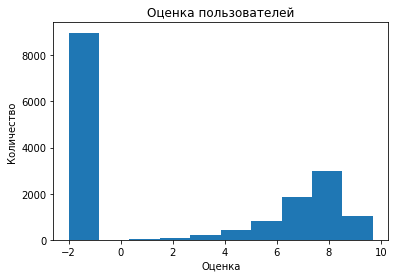

In [23]:
plt.hist(data['user_score'])
plt.title('Оценка пользователей')
plt.xlabel('Оценка')
plt.ylabel('Количество')
plt.show()

Теперь рассмотрим столбец `rating`. Как было замечено ранее в нем 6766 пропусков.

In [24]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [25]:
data['rating'].describe()

count     9768
unique       8
top          E
freq      3921
Name: rating, dtype: object

Заменим пропуски в столбце `rating` на значение `undefined`

In [26]:
data['rating'] = data['rating'].fillna('undefined')

<font color='DarkBlue'><b>Комментарий ревьюера 0</b></font><br>
<font color='DarkMagenta'>👉 Правильно поставлена заглушка на пропуски в колонке рейтинга. А если посмотреть в интернете, что такое рейтинг ESRB, то узнаем, что это рейтинг для США и Канады. А значит пропуск не связан с ошибкой заполнения данных, просто не только для Северной Америки выпускаются игры.</font>

In [27]:
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [28]:
data.shape

(16444, 11)

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [29]:
data['total_sales'] = data.loc[:,['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,undefined,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1,-1.0,undefined,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1,-1.0,undefined,28.31


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.6+ MB


In [31]:
# data = data.drop_duplicates()

# print(data[data.duplicated(['name', 'platform', 'year_of_release'])].count())
# print(data[data.duplicated(['name', 'platform', 'year_of_release'])])
# data = data.drop_duplicates(['name', 'platform', 'year_of_release'])
# print(data[data.duplicated(['name', 'platform', 'year_of_release'])].count())

<font color='DarkBlue'><b>Комментарий ревьюера 0</b></font><br>
<font color='Red'>🛠 Вынужден сообщить, что данный код заимствован. Вот авторский код:</font><br>
https://oxoi.ru/ru/iap?view=article&id=85
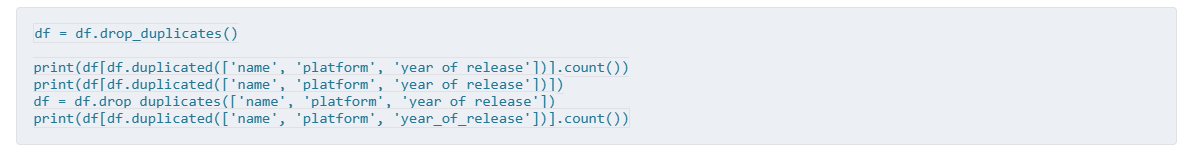

</font><font color='Blue'><b>Комментарий студента</b></font><br>
Все исправления будут представлены в самом конце файла

Во всех данных провели поиск неявных дубликатов одновременно по столбцам name, platform, year_of_release. Таких дубликатов оказалось всего два. Обобразили количество повторов по столбцам. Вывели эти строки и удалили с последующей проверкой.

**Вывод по предобработке данных:**

- Явные дубликаты не обнаружены
- Удалены строки с неявными дубликатами поиск одновременно по `name`, `platform`, `year_of_release`
- По столбцу `name` удалены 2 строки с пропусками
- По столбцу `year_of_release` принято решение заменить строки с пропусками медианой
- В столбце `critic_score` количество пропусков достаточно большое, поэтому их обозначим как -1
- В столбце `user_score` количество пропусков достаточно большое, поэтому их обозначим как -1, неописанное значение tbd обозначено как -2
- В столбце `rating` пропуски обозначены как `undefined`
- Столбцы `year_of_release`, `critic_score` приведены к `int` типу, `user_score` к `float` в соответствии с данными содержащимися в них.
- Пропуски могли появиться из-за сбора данных из различных источников, которые не согласованы между собой.
- Посчитали суммарные продажи во всех регионах записали в total_sales

<font color='DarkBlue'><b>Комментарий ревьюера 0</b></font><br>
<font color='Red'>🛠 Выводы то же списаны с того же источника.</font>
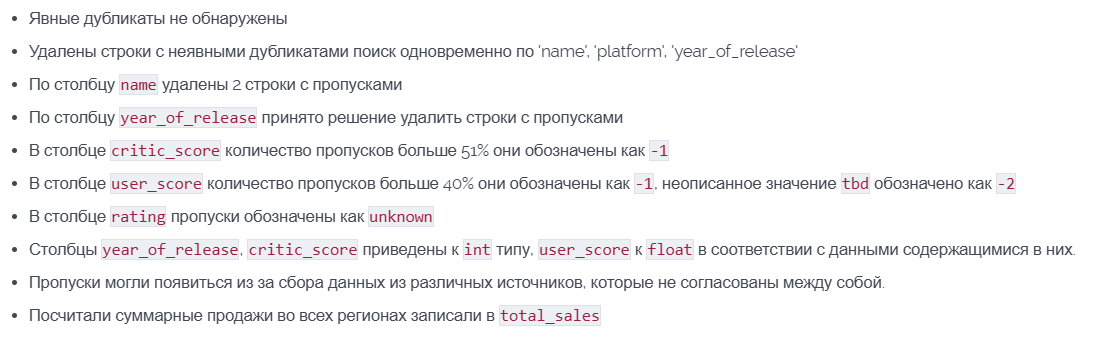

**Исследовательский анализ данных**

- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.

- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы. Соотнесите выводы с продажами игр на других платформах.

- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

**Выпуск игр по годам**

In [32]:
# (
#     data
#     .pivot_table(index='year_of_release', values='name', aggfunc='count')
#     .plot(kind='bar' , grid=True, figsize=(10, 5))
# )
# plt.title('Количество продаж по годам')
# plt.xlabel('Год')
# plt.ylabel('Количество продаж')
# plt.show()

# data[data['year_of_release'] > -1]['year_of_release'].describe()

<font color='DarkBlue'><b>Комментарий ревьюера 0</b></font><br>
<font color='Red'>🛠 Вынужден прервать ревью, проект с писан с https://oxoi.ru/ru/iap?view=article&id=85.</font>
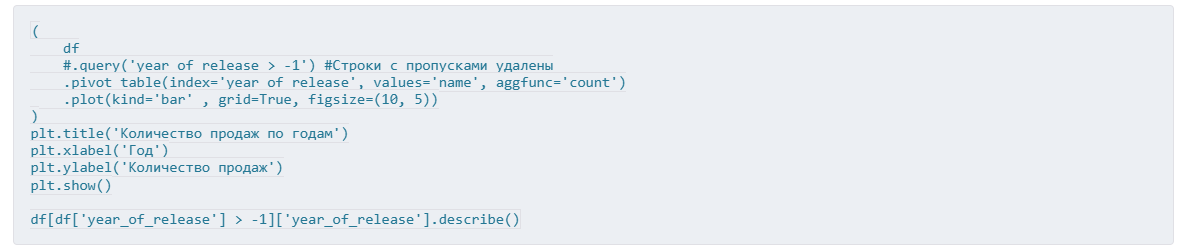

- В таблице представлены игры с выпуском с 1980 по 2016 год.
- Рост числа выпуска игр приходится на 1995 год, с максимумом примерно в 2007 году после чего прослеживается спад.
- С 2012 года объем выпуска игр стабилизировался и год от года отличается несильно.
- В целях исследования логично выбрать период в 5 - 10 лет (старые игры забываются, новые сильнее влияют на рынок).

**Исследование продаж по платформам.**

In [33]:
# (
#     data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
#     .sort_values(by='total_sales', ascending=False)
#     .plot(kind='bar' , grid=True, figsize=(10, 5))
# )
# plt.title('Количество суммарных продаж в зависимости от платформы')
# plt.xlabel('Платформа')
# plt.ylabel('Суммарные продажи')
# plt.show()

Наибоше суммарных продаж зафиксировано у 6 платформ: `PS2`, `X360`, `PS3`, `Wii`, `DS`, `PS`

In [34]:
# top_sales = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index().head(6)['platform'].tolist()
# top_sales

In [35]:
# for name in top_sales:
#     (
#     data.query('platform == @name and year_of_release > -1')
#     .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
#     .sort_values('year_of_release', ascending = False)['total_sales']
#     .plot(figsize = (10, 5), label=name)
#     )
#     plt.title('Жизненный цикл шести платформ с максимальными продажами')
#     plt.xlabel('Год выпуска')
#     plt.ylabel('Суммарные продажи')
#     plt.legend() 

In [36]:
# data.query('platform == "DS" and year_of_release < 1990')

In [37]:
# data = data.drop(index = 15957)
# for name in top_sales:
#     (
#     data.query('platform == @name')
#     .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
#     .sort_values('year_of_release', ascending = False)['total_sales']
#     .plot(figsize = (10, 5), label=name)
#     )
#     plt.title('Жизненный цикл шести платформ с максимальными продажами')
#     plt.xlabel('Год выпуска')
#     plt.ylabel('Суммарные продажи')
#     plt.legend() 

Расчитаем время жизненного цикла по всем данным

In [38]:
# time_life = data.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
# # в срок жизни платформы, должны входить границы диапазона, поэтому +1
# time_life['life'] = time_life['max'] - time_life['min'] + 1 
# print('Медианное значение жизненного цикла по всей выборке', time_life['life'].median(), 'лет')

In [39]:
# t = np.ceil(time_life['life'].median()/2)
# print('Определим актуальный период за последние', t, 'года')

Из графиков видно, что от срока появления платформы до их исчезновения как правило проходит 10 лет, следовательно для нас интересны платформы, релиз которых состоялся 3-5 годами ранее и которые активно растут в продажах. Определим, что актуальный период составляет 4 последних года.

**Исследование перспективных платформ**

In [40]:
# actual_platforms = (data
#     .query('year_of_release >= 2016-@t')
#     .pivot_table(index='platform', values='total_sales', aggfunc='sum')
#     .sort_values(by='total_sales', ascending=False)
#     .reset_index().head(10)['platform'].tolist()
#     )                         
# actual_platforms

In [41]:
# actual_df = data.query('year_of_release >= 2016-@t').copy().reset_index(drop= True)
# actual_df.head()

In [42]:
# for name in actual_platforms:
#     (
#     actual_df.query('platform == @name')
#     .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
#     .sort_values('year_of_release', ascending = False)['total_sales']
#     .plot(kind='line', figsize = (10, 5), label=name)
#     )
#     plt.title('Жизненный цикл всех платформ за актуальный период')
#     plt.xticks(np.arange(2012, 2018, step=1))
#     plt.xlabel('Год')
#     plt.ylabel('Суммарные продажи')
#     plt.legend() 

Из графика видно, что на 2016 год нет явно возрастающих продаж по консолям, продажи падают на всех консолях. Более или менее перспективными являются консоли PS4 и XOne но у них также прослеживаются уменьшения продаж.

**Исследуем «Ящик с усами» по глобальным продажам игр в разбивке по платформам актуального периода.**

In [43]:
# plt.figure(figsize=(12,6))
# sns.boxplot(data=actual_df, x='platform', y='total_sales')
# plt.title('Продажи по перспективным платформам с выбросами', fontsize=15)
# plt.xlabel('Платформа', fontsize=12)
# plt.ylabel('Продажи по платформам',fontsize=12)

In [44]:
# actual_df['total_sales'].describe()

In [45]:
# plt.figure(figsize=(12,6))
# ax = sns.boxplot(data=actual_df, x='platform', y='total_sales')
# ax.set(ylim=(0,2))
# plt.title('Продажи по перспективным платформам с крупными `Boxplot`', fontsize=15)
# plt.xlabel('Платформа', fontsize=12)
# plt.ylabel('Продажи по платформам',fontsize=12)

- Медианное значение по всей выборке составляет 0,13 но у большинства консолей данный показатель не совпадает с основным.
- По первой и третьей квартили также наблюдается большой разброс.
- Почти по всем консолям присутствуют выбросы по продажам.

**Влияние отзывов на продажи**

In [46]:
# actual_platforms_5 = (actual_df
    
#     .pivot_table(index='platform', values='total_sales', aggfunc='sum')
#     .sort_values(by='total_sales', ascending=False)
#     .reset_index().head(5)['platform'].tolist()
#     )                         
# actual_platforms_5

In [47]:
# for name in actual_platforms_5:
#     (
#     actual_df
#         .query('platform == @name and user_score > -1')
#         .plot(x='user_score', 
#           y='total_sales', 
#           kind='scatter', 
#           figsize=(10, 5), 
#           color='blue')
#     )
#     plt.title(f'Диаграмма распределения между оценками пользователей и продажами по платформе {name}')
#     plt.xlabel('Оценка пользователей')
#     plt.ylabel('Продажи')
#     plt.legend([name])
#     print(f'Корреляция между оценками пользователей и продажами по платформе {name}  =', actual_df.query('platform == @name and user_score > -1')['user_score'].corr(actual_df.query('platform == @name and user_score > -1')['total_sales']))
#     plt.show()

Диаграммы распределения явно показывают на слабую связь между оценкой пользователей и продажами в разрезе отдельных платформ, соответствующий коэффициент корреляции подтверждает это (лишь в некоторых случаях он приближается к 0,2).

Построим диаграмму распределения и вычислим корреляцию между оценкой критиков и продажами в разрезе отдельных платформ

In [48]:
# for name in actual_platforms_5:
#     (
#     actual_df
#         .query('platform == @name and critic_score > -1')
#         .plot(x='critic_score', 
#           y='total_sales', 
#           kind='scatter', 
#           figsize=(10, 5), 
#           color='green')
#     )
#     plt.title(f'Диаграмма распределения между оценками критиков и продажами по платформе {name}')
#     plt.xlabel('Оценка критиков')
#     plt.ylabel('Продажи')
#     plt.legend([name])
#     print(f'Корреляция между оценками критиков и продажами по платформе {name}  =', actual_df.query('platform == @name and critic_score > -1')['critic_score'].corr(actual_df.query('platform == @name and critic_score > -1')['total_sales']))
#     plt.show()

Диаграммы распределения явно показывают на умеренную связь между оценкой критиков и продажами в разрезе отдельных платформ, соответствующий коэффициент корреляции подтверждает это (колеблется от 0,32 до 0,42).

Сделаем аналогичные расчеты для всего набора данных.

In [49]:
# print('Общая корреляция между оценками пользователей и продажами = ', actual_df.query('user_score > -1')['user_score'].corr(actual_df['total_sales']))
# print('Общая корреляция между оценками критиков и продажами = ', actual_df.query('critic_score > -1')['critic_score'].corr(actual_df['total_sales']))

In [50]:
# (
#  actual_df.query('user_score > -1')
#     .plot(x='user_score', 
#           y='total_sales', 
#           kind='scatter', 
#           figsize=(10, 5), 
#           color='blue')
# )
# plt.title('Диаграмма распределения между оценками пользователей и продажами', fontsize=15)
# plt.xlabel('Оценка пользователей', fontsize=12)
# plt.ylabel('Продажи',fontsize=12)
# plt.show()

In [51]:
# (
#  actual_df.query('critic_score > -1')
#     .plot(x='critic_score', 
#           y='total_sales', 
#           kind='scatter', 
#           figsize=(10, 5), 
#           color='green')
# )
# plt.title('Диаграмма распределения между оценками критиков и продажами', fontsize=15)
# plt.xlabel('Оценка критиков', fontsize=12)
# plt.ylabel('Продажи',fontsize=12)
# plt.show()

Расчитанная корреляция по актуальному периоду указывает что:

- Диаграммы распределения явно показывают на слабую связь между оценкой пользователей и продажами по всей совокупности данных (приближается к 0,031).
- Диаграммы распределения явно показывают на умеренную связь между оценкой критиков и продажами в разрезе отдельных платформ, соответствующий коэффициент корреляции подтверждает это (приближается к 0,33).

**Выводы по исследованию оценок на продажи**

Диаграммы зависимости оценок на показатели продаж и коэффициенты корреляции по отдельным платформам указывают, что:

- между оценками пользователей и продажами слабая связь и нелинейная
- между оценками критиков и продажами связь умеренная и скорее всего нелинейная

По отношению к общим показателям значения даже больше, что указывает на то что, по всем платформам:

- между оценками пользователей и продажами слабая связь и нелинейная
- между оценками критиков и продажами связь умеренная и скорее всего нелинейная

**Исследование распределения игр по жанрам**

In [52]:
# (actual_df
#  .pivot_table(index='genre', values='total_sales', aggfunc='sum')
#  .sort_values('total_sales', ascending=False)
#  .plot(kind='bar', y='total_sales', figsize=(10, 5), legend=False,title = 'Прибыльность жанров в актуальном периоде')
#  .set(xlabel='Жанр игры', ylabel='Всего продаж по жанру'))

# plt.show()

In [53]:
# plt.figure(figsize=(12,6))
# ax = sns.boxplot(data=actual_df, x='genre', y='total_sales')
# plt.title('Продажи по перспективным жанрам', fontsize=15)
# plt.xlabel('Жанр', fontsize=12)
# plt.ylabel('Продажи по жанрам',fontsize=12)
# plt.show()

In [54]:
# plt.figure(figsize=(12,6))
# ax = sns.boxplot(data=actual_df, x='genre', y='total_sales')
# ax.set(ylim=(0,1.5))
# plt.title('Продажи по перспективным жанрам', fontsize=15)
# plt.xlabel('Жанр', fontsize=12)
# plt.ylabel('Продажи по жанрам',fontsize=12)
# plt.show()

In [55]:
# (
#  actual_df
#  .pivot_table(index='genre', values='total_sales', aggfunc='median')
#  .sort_values('total_sales', ascending=False)
# )

- За последние четыре года наиболее востребованными являются `Action`, `Shooter`.
- Дополнительное исследование и сравнение медианных значений по продажам в разрезе жанров указывает, что предпочтение в жанрах надо отдавать `Shooter`, `Sports` обладающих большим медианным значением прибыли.

**Вывод по исследовательскому анализу данных**

- В целях исследования логично выбрать период в 5 - 10 лет (старые игры забываются, новые сильнее влияют на рынок).
- Определили, что актуальный период составляет 4 последних года.
- На 2016 год нет явно возрастающих продаж по консолям, продажи падают на всех консолях. Более или менее перспективными являются консоли PS4 и XOne, но у них также прослеживаются уменьшения продаж.
- между оценками пользователей и продажами слабая связь и нелинейная
- между оценками критиков и продажами связь умеренная и скорее всего нелинейная
- Предпочтение в жанрах надо отдавать `Shooter`, `Sports` обладающих большим медианным значением прибыли

**Определим портрет пользователя каждого региона**

Определите для пользователя каждого региона (NA, EU, JP):

- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**Топ-5 самых популярных платформ по регионам**

In [56]:
# na = (
#       actual_df
#         .pivot_table(index=['platform'], values=['na_sales'], aggfunc='sum')
#         .sort_values('na_sales', ascending=False).reset_index()
#      )
# na.loc[5:,'platform'] = 'Other'
# na.loc[5,'na_sales'] =  na.loc[5:,'na_sales'].sum().round(2)
# na = na.iloc[0:6, :]
# eu = (
#       actual_df
#         .pivot_table(index=['platform'], values=['eu_sales'], aggfunc='sum')
#         .sort_values('eu_sales', ascending=False).reset_index()
#      )
# eu.loc[5:,'platform'] = 'Other'
# eu.loc[5,'eu_sales'] =  eu.loc[5:,'eu_sales'].sum().round(2)
# eu = eu.iloc[0:6, :]
# jp = (
#       actual_df
#         .pivot_table(index=['platform'], values=['jp_sales'], aggfunc='sum')
#         .sort_values('jp_sales', ascending=False).reset_index()
#      )
# jp.loc[5:,'platform'] = 'Other'
# jp.loc[5,'jp_sales'] =  jp.loc[5:,'jp_sales'].sum().round(2)
# jp = jp.iloc[0:6, :]
# ps = pd.merge(na, eu, left_index=True, right_index=True)
# ps = pd.merge(ps, jp, left_index=True, right_index=True)
# ps.rename(columns = {'platform_x':'na_platform', 'platform_y':'eu_platform', 'platform':'jp_platform'}, inplace = True )

# ps

In [57]:
# data = {'region': ['NA - Америка', 'EU - Европа', 'JP - Япония'], 'platform': ['na_platform', 'eu_platform', 'jp_platform'], 'sales': ['na_sales', 'eu_sales', 'jp_sales']} 
# regions = pd.DataFrame(data) 
# regions

In [58]:
# for i in regions.index :
#     name = regions['region'][i]
#     (ps.pivot_table(index=regions['platform'][i], values=regions['sales'][i], aggfunc='sum')
#      .plot(kind='pie', y=regions['sales'][i], autopct='%1.0f%%', figsize=(7, 7), legend=False)
#      .set(ylabel='Доля продаж от всех в регионе (%)')
#     )
#     plt.title(f'Топ-5 самых популярных платформ в регионе {name}')
#     plt.show()

In [59]:
# print('ТОП - 5 платформ по регионам NA, EU, JP и доли продаж по ним')
# ps.na_sales = round(ps.na_sales/ps.na_sales.sum()*100, 2)
# ps.eu_sales = round(ps.eu_sales/ps.eu_sales.sum()*100, 2)
# ps.jp_sales = round(ps.jp_sales/ps.jp_sales.sum()*100, 2)
# ps

Выяснилось что пользователи по регионам в основном используют платформы в соответствии с долями указанными в таблице выше.
В топ в регионах `NA` и `EU` входят одинаковые платформы с перестановкой их предпочтения.
На на рынке JP присутствуют специализированные региональные платформы. 

**Топ-5 самых популярных жанров по регионам**

In [60]:
# na = (
#       actual_df
#         .pivot_table(index=['genre'], values=['na_sales'], aggfunc='sum')
#         .sort_values('na_sales', ascending=False).reset_index()
#      )
# na.loc[5:,'genre'] = 'Other'
# na.loc[5,'na_sales'] =  na.loc[5:,'na_sales'].sum().round(2)
# na = na.iloc[0:6, :]
# eu = (
#       actual_df
#         .pivot_table(index=['genre'], values=['eu_sales'], aggfunc='sum')
#         .sort_values('eu_sales', ascending=False).reset_index()
#      )
# eu.loc[5:,'genre'] = 'Other'
# eu.loc[5,'eu_sales'] =  eu.loc[5:,'eu_sales'].sum().round(2)
# eu = eu.iloc[0:6, :]
# jp = (
#       actual_df
#         .pivot_table(index=['genre'], values=['jp_sales'], aggfunc='sum')
#         .sort_values('jp_sales', ascending=False).reset_index()
#      )
# jp.loc[5:,'genre'] = 'Other'
# jp.loc[5,'jp_sales'] =  jp.loc[5:,'jp_sales'].sum().round(2)
# jp = jp.iloc[0:6, :]
# gs = pd.merge(na, eu, left_index=True, right_index=True)
# gs = pd.merge(gs, jp, left_index=True, right_index=True)
# gs.rename(columns = {'genre_x':'na_genre', 'genre_y':'eu_genre', 'genre':'jp_genre'}, inplace = True )

# data = {'region': ['NA - Америка', 'EU - Европа', 'JP - Япония'], 'genre': ['na_genre', 'eu_genre', 'jp_genre'], 'sales': ['na_sales', 'eu_sales', 'jp_sales']} 
# regions = pd.DataFrame(data) 

# for i in regions.index :
#     name = regions['region'][i]
#     (gs.pivot_table(index=regions['genre'][i], values=regions['sales'][i], aggfunc='sum')
#      .plot(kind='pie', y=regions['sales'][i], autopct='%1.0f%%', figsize=(7, 7), legend=False)
#      .set(ylabel='Доля продаж от всех в регионе (%)')
#     )
#     plt.title(f'Топ-5 самых популярных жанров в регионе {name}')
#     plt.show()

In [61]:
# print('ТОП - 5 жанров по регионам NA, EU, JP и доли продаж по ним')
# gs.na_sales = round(gs.na_sales/gs.na_sales.sum()*100, 2)
# gs.eu_sales = round(gs.eu_sales/gs.eu_sales.sum()*100, 2)
# gs.jp_sales = round(gs.jp_sales/gs.jp_sales.sum()*100, 2)
# gs

Выяснилось что пользователи по регионам предпочитают жанры игр в соответствии с долями указанными в таблице выше. В топ в регионах `NA` и `EU` входят одинаковые жанры почти с одинаковым распределением. На рынке JP предпочитают Role-Playing, Action которые суммарно занимают почти 60% рынка.

**Влияние рейтинга ESRB на продажи в регионах**

In [62]:
# regions = ['na_sales', 'eu_sales', 'jp_sales']

# for region in regions:
#     if region == 'na_sales':
#         name = 'NA - Америка'
#     elif region == 'eu_sales':
#         name = 'EU - Европа'
#     else:
#         name = 'JP - Япония'
#     (actual_df.pivot_table(index='rating', values=region, aggfunc='sum')
#      .sort_values(region, ascending=False)
#      .plot(kind='pie', y=region, autopct='%1.0f%%', figsize=(7, 7), legend=False, title = region)
#      .set(ylabel='Доля продаж в зависимости от рейтинга ESRB в %')
#     )
#     plt.title(f'Доля продаж в зависимости от рейтинга ESRB в регионе {name}')
#     plt.show()

В регионах NA и EU большая часть продаж приходится на рейтинг "M" (для взрослых) - 37% на втором месте с рейтингом для всех "Е" 21%, на рынке JP первое место занимают игры с неуказанным рейтингом "undefined" - 56%, затем игры для всех "Е" - 15%.

**Вывод по портрету пользователя в зависимости от региона**

- Портре пользователя в регионах `NA` и `EU` почти совпадает. Лидирует платформа `PS4`, `PS3`, `X360` жанры `Action`, `Sports` игры с рейтингом `M` - для взрослых
- Портрет пользователя из региона `JP` консоль `3DS`, `PS3` жанр `Role-Playing`, `Action` игры с неуказанным рейтингом `unknown`

**Проверка гипотез**

Выдвинем гипотезы:

- `Н0`: Средние пользовательские рейтинги платформ `XOne` и `PC` равны
- `Н1`: Средние пользовательские рейтинги платформ `XOne` и `PC` не равны

In [63]:
# xone = actual_df.query('platform == "XOne" and user_score > -1')
# print('Описательная статистика пользовательских рейтингов по XOne\n\n', xone['user_score'].describe())
# pc = actual_df.query("platform == 'PC' and user_score > -1")
# print('Описательная статистика пользовательских рейтингов по PC\n\n', pc['user_score'].describe())

Предварительный описательный анализ указывает, что выборки не равны в размерах, у них разные среднеквадратические отклонения а значит и дисперсии. Критерий проверки обычно устанавливают в пределах от 1% до 10%. В общем случае установим критерий проверки 5%.

In [64]:
# alpha = 0.05

# results = st.ttest_ind(
#     xone['user_score'], 
#     pc['user_score'],
#     equal_var=False, #для различных дисперсий
#     alternative='two-sided') #для проверки на неравенство (в обе стороны)

# print(results.pvalue)

# if results.pvalue < alpha:
#     print('Отвергаем нулевую гипотезу')
# else:
#     print('Не получилось отвергнуть нулевую гипотезу')

Не получилось отвергнуть нулевую гипотезу, есть основания утверждать, что рейтинги платформ `XOne` и `PC` равны, при установленном уровне значимости в 5 %.

Выдвинем гипотезы:

- `Н0`: Средние пользовательские рейтинги жанров `Action` и `Sports` равны
- `Н1`: Средние пользовательские рейтинги жанров `Action` и `Sports` не равны

In [65]:
# action = actual_df.query('genre == "Action" and user_score > -1')
# print('Описательная статистика пользовательских рейтингов по Action\n\n', action['user_score'].describe())
# sports = actual_df.query("genre == 'Sports' and user_score > -1")
# print('Описательная статистика пользовательских рейтингов по Sports\n\n', sports['user_score'].describe())

Предварительный описательный анализ указывает, что выборки не равны в размерах, у них разные среднеквадратические отклонения а значит и дисперсии. Критерий проверки обычно устанавливают в пределах от 1% до 10%. В общем случае установим критерий проверки 5%.

In [66]:
# alpha = 0.05

# results = st.ttest_ind(
#     action['user_score'], 
#     sports['user_score'],
#     equal_var=False, #для различных дисперсий
#     alternative='two-sided') #для проверки на неравенство (в обе стороны)

# print(results.pvalue)

# if results.pvalue < alpha:
#     print('Отвергаем нулевую гипотезу')
# else:
#     print('Не получилось отвергнуть нулевую гипотезу')

Нулевая гипотеза отвергнута и исходя от противного, есть основания утверждать, что рейтинги жанров `Action` и `Sports` не равны, а значит разные, при установленном уровне значимости в 5 %.

**Вывод по гипотезам**

- Не получилось отвергнуть нулевую гипотезу, есть основания утверждать, что рейтинги платформ `XOne` и `PC` равны, при установленном уровне значимости в 5 %.
- Нулевая гипотеза отвергнута, есть основания утверждать, что рейтинги жанров `Action` и `Sports` не равны, а значит разные, при установленном уровне значимости в 5 %.

**Вывод**

В процессе исследования данных о продажах игр, оценки пользователей и экспертов, жанрах и платформах, были отработаны принципы работы с данными по выявлению определяющих успешность игры закономерностях, выполнены следующие этапы и сделаны выводы:

1. Изучили общую информацию о данных

- Всего в таблице 16715 строк и 11 колонок в шести колонках имеются пропуски в данных
- Названия колонок имеют нарушение стилей
- Ряд колонок имеет неверный тип
- Данных достаточно для проведения исследования

2. Предобработали данные

- Явные дубликаты не обнаружены
- Удалены строки с неявными дубликатами поиск одновременно по `name`, `platform`, `year_of_release`
- По столбцу `name` удалены 2 строки с пропусками
- По столбцу `year_of_release` принято решение заменить строки с пропусками медианой
- В столбце `critic_score` количество пропусков достаточно большое, поэтому их обозначим как -1
- В столбце `user_score` количество пропусков достаточно большое, поэтому их обозначим как -1, неописанное значение tbd обозначено как -2
- В столбце `rating` пропуски обозначены как `undefined`
- Столбцы `year_of_release`, `critic_score` приведены к `int` типу, `user_score` к `float` в соответствии с данными содержащимися в них.
- Пропуски могли появиться из-за сбора данных из различных источников, которые не согласованы между собой.
- Посчитали суммарные продажи во всех регионах записали в total_sales

3. Провели исследовательский анализ данных

- В целях исследования логично выбрать период в 5 - 10 лет (старые игры забываются, новые сильнее влияют на рынок).
- Определили, что актуальный период составляет 4 последних года.
- На 2016 год нет явно возрастающих продаж по консолям, продажи падают на всех консолях. Более или менее перспективными являются консоли PS4 и XOne, но у них также прослеживаются уменьшения продаж.
- между оценками пользователей и продажами слабая связь и нелинейная
- между оценками критиков и продажами связь умеренная и скорее всего нелинейная
- Предпочтение в жанрах надо отдавать `Shooter`, `Sports` обладающих большим медианным значением прибыли

4. Составли портрет пользователя каждого региона

- Портре пользователя в регионах `NA` и `EU` почти совпадает. Лидирует платформа `PS4`, `PS3`, `X360` жанры `Action`, `Sports` игры с рейтингом M - для взрослых
- Портрет пользователя из региона `JP` консоль `3DS`, `PS3` жанр `Role-Playing`, `Action` игры с неуказанным рейтингом `undefined`

5. Проверили гипотезы

- Не получилось отвергнуть нулевую гипотезу, есть основания утверждать, что рейтинги платформ `XOne` и `PC` равны, при установленном уровне значимости в 5 %.
- Нулевая гипотеза отвергнута, есть основания утверждать, что рейтинги жанров `Action` и `Sports` не равны, а значит разные, при установленном уровне значимости в 5 %.


<font color='DarkBlue'><b>Заключительный комментарий ревьюера</b></font><br><br>
<font color='DarkGreen'>👌 Диана, проект, увы, написан с заимствованием чужого кода.<br>Вот код автора: https://oxoi.ru/ru/iap?view=article&id=85.<br> </font>
<font color='Red'>🛠 Для сдачи этого проекта все исследование надо сделать самостоятельно с подробными комментариями перед кодом: что мы делаем и зачем, с комментариями после кода: что мы в результате получили, с подробными промежуточными выводами по каждому разделу проекта. А так же исправить уже обнаруженные ошибки: Переделать обработку пропусков по годам релиза.</font><br>
<font color='DarkGreen'>👌 Жду самостоятельно написанный проект! Проект можно сделать на базе полученных в тренажере знаний.</font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>
Далее приведен самостоятельный исследовательский проект

In [67]:
print(data.shape)
data.duplicated().count()

(16444, 12)


16444

Явных дубликатов не обнаружено

In [68]:
# Комментарий ревьюера
# Посмотрим, что осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Обращаю внимание, что проект не имеет необходимого оформления. Проект должен иметь структру с разделами и подразделами исследования, с формулировкой промежуточной задачи, с комментариями, что мы делаем, что получили. Каждый раздел/подраздел должен начинаться с названия, отражающего его содержание, и решаемой задачи, заканчиваться промежуточным выводом. Отдельные строки кода выполняющие необходимые преобразования должны находиться в отдельных исполняемых ячейках, комментарии и промежуточные выводы должны размещаться в отдельных ячейках 'markdown'. Необходимо пройти по шагам проекта и добавить необходимые элементы. Подробнее описано в "Полезных инструкциях для учёбы".</font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>
Добавление раздела: **`Исследовательский анализ`**
- ***а также добавление подпунктов этого раздела.***

**Исследовательский анализ**

- ***Посмотрим сколько игр выпускалось в разные годы***

In [69]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'total_sales'],
      dtype='object')

In [70]:
data['year_of_release'].value_counts().count()

37

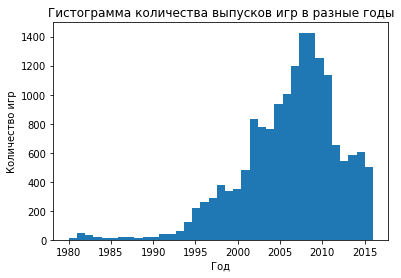

In [71]:
plt.hist(data['year_of_release'], bins=37)
plt.title('Гистограмма количества выпусков игр в разные годы')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошая визуализация и правильно, что оси подписаны и есть название графика.</font>

Исходя из этой гистограммы можно сделать вывод, что большая часть игр выпускалась в 2008-2009 годах. Дальше продажи пошли на спад. Если смотреть на начало графика, то можно увидеть, что игры стали покупать в большом количестве в 2000-х, поэтому информация за 1980 - 1999 годы не важна. 

- ***Рассмотрим, как менялись продажи по платформам.***


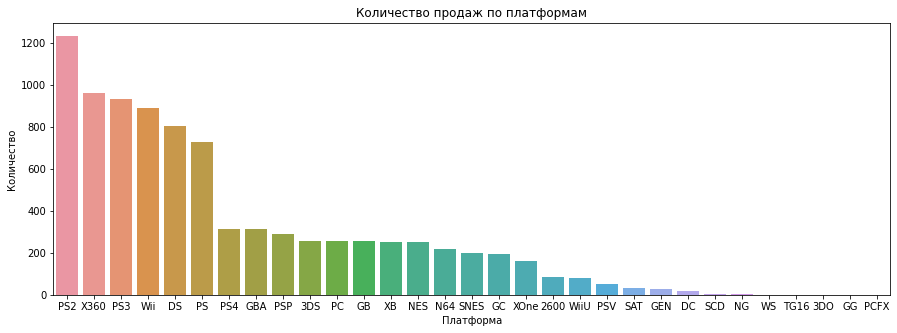

In [72]:
platform_sales = data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
platform_sales = platform_sales.sort_values(by='total_sales', ascending=False)

plt.figure(figsize=(15, 5))
sns.barplot(x=platform_sales.index, y='total_sales', data=platform_sales.reset_index())
plt.title('Количество продаж по платформам')
plt.xlabel('Платформа')
plt.ylabel('Количество')
plt.show()

Из графика можно заметить, что большое количество игр покупали у платформ `PS2`, `X360`, `PS3`, `Wii`, `DS`, `PS`. Далее заметен резкий спад продаж у других платформ.

Построим распределение по годам у этих платформ.

In [73]:
best_platform_sales = platform_sales.reset_index()['platform'][:6].to_list()
best_platform_sales

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

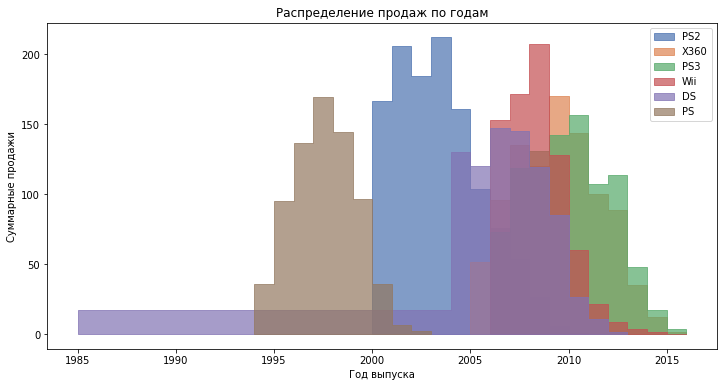

In [74]:
colors = sns.color_palette("deep", n_colors=len(best_platform_sales))
fig, ax = plt.subplots(figsize=(12, 6))
for i, platform in enumerate(best_platform_sales):
    platform_sales = (
        data.query(f'platform == "{platform}" and year_of_release > -1')
        .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
        .sort_index(ascending=False)

    )
    platform_sales_values = platform_sales.values.flatten()
    plt.fill_between(platform_sales.index, platform_sales_values, step="post", color=colors[i], alpha=0.7, label=platform)

plt.title('Распределение продаж по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи')
plt.legend()
plt.show()

Исходя из этого графика можно заметить, что выбивается платформа `DS`

In [75]:
data.query('platform == "DS" and year_of_release < 2000')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,-1,-1.0,undefined,0.02


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что нашли ошибку с платформой DS. Там всего одна игра в 1985 году, но в этом году данной платформы не существовало, явно ошибка.</font>

Можем заметить, что здесь всего одна строка, поэтому от нее можно спокойно избавиться

In [76]:
data = data.drop(index=15957)

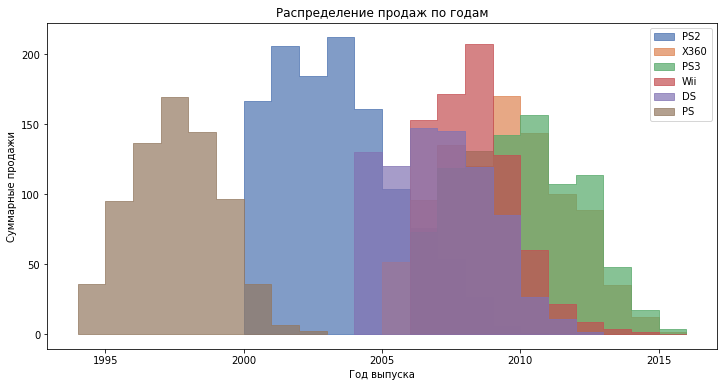

In [77]:
colors = sns.color_palette("deep", n_colors=len(best_platform_sales))
fig, ax = plt.subplots(figsize=(12, 6))
for i, platform in enumerate(best_platform_sales):
    platform_sales = (
        data.query(f'platform == "{platform}" and year_of_release > -1')
        .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
        .sort_index(ascending=False)

    )
    platform_sales_values = platform_sales.values.flatten()
    plt.fill_between(platform_sales.index, platform_sales_values, step="post", color=colors[i], alpha=0.7, label=platform)

plt.title('Распределение продаж по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи')
plt.legend()
plt.show()

Выясним за какой характерный срок появляются новые и исчезают старые платформы.

In [78]:
life_cycle = data.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max'])
life_cycle.columns = ['min', 'max']
life_cycle

,min,max
platform,,
2600,1980,1989
3DO,1994,1995
3DS,2011,2016
DC,1998,2008
DS,2004,2013
GB,1988,2001
GBA,2000,2007
GC,2001,2007
GEN,1990,1994


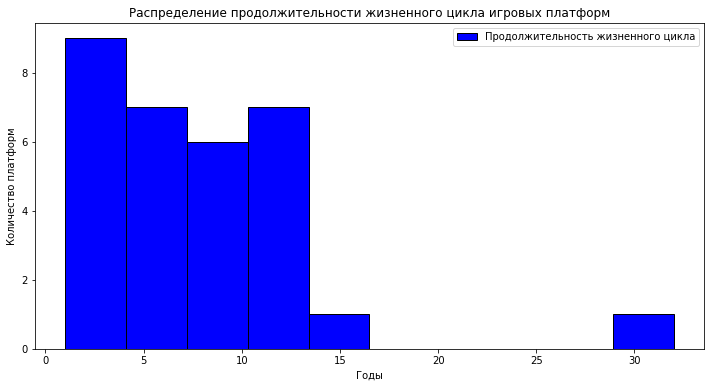

In [79]:
fig, ax = plt.subplots(figsize=(12, 6))
life_cycle['life_cycle'] = life_cycle['max'] - life_cycle['min'] + 1
ax.hist(life_cycle['life_cycle'], color='blue', edgecolor='black')

ax.legend(['Продолжительность жизненного цикла'])
ax.set_title('Распределение продолжительности жизненного цикла игровых платформ')
ax.set_xlabel('Годы')
ax.set_ylabel('Количество платформ')
plt.show()

In [80]:
life_cycle['life_cycle'].median()

7.0

Таким образом можно сделать вывод, что жизненный цикл игровых платформ составляет в среднем 7 лет.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Задания Инструкции задают внутреннюю логику проекта. Каждое задание является разделом/подразделом проекта. Соответственно, подраздел должен иметь название и должна быть сформулирована задача, которая выполняется в этом подразделе. </font>

- ***Исследование перспективных платформ***

Теперь определимся с актуальным периодом. Логичнее выбирать период, когда продажи по платформам растут или находятся на пике.

In [81]:
np.ceil(life_cycle['life_cycle'].median()/2)

4.0

Таким образом, для построения прогноза на 2017 год, актуальным периодом будет: 4 года

In [82]:
actual_period_data = data.query('year_of_release >= 2012')
actual_period_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,undefined,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,undefined,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильно выбран актуальный период. 👍 Сейчас в наше динамичное время в бизнесе уже используются для прогноза периоды в 2-3 года.</font>

Определим какие платформы лидируют по продажам, растут или падают.

In [83]:
(
    actual_period_data
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
)

,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


Исходя из этих данных можно сделать вывод, что по продажам лидируют платформы `PS4`, `PS3`, `X360`. Теперь рассмотрим как у платформ распределены продажи по годам

In [84]:
actual_platforms = (
    actual_period_data
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False).reset_index()['platform'].to_list()
)
actual_platforms

['PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU', 'PC', 'PSV', 'Wii', 'DS', 'PSP']

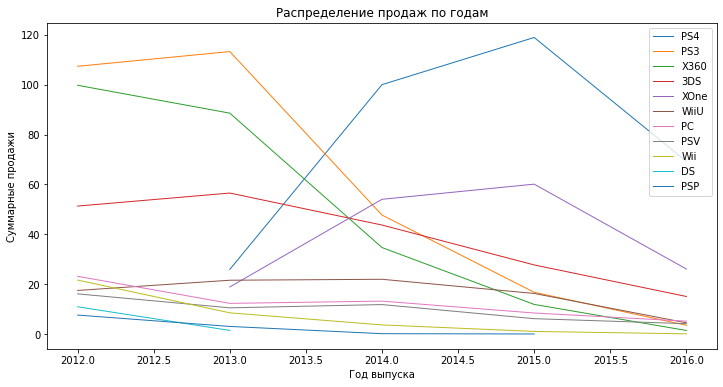

In [85]:
plt.subplots(figsize=(12, 6))
for i, platform in enumerate(actual_platforms):
    platform_sales = (
        actual_period_data.query(f'platform == "{platform}"')
        .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
        .sort_index(ascending=False)

    )
    platform_sales_values = platform_sales.values.flatten()
    plt.plot(platform_sales.index, platform_sales_values, linewidth=1, label=platform)

plt.title('Распределение продаж по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи')
plt.legend()
plt.show()

Исходя из данных графика можно сделать вывод, что у всех платформ продажи к 2016 году падают, однако у `PS4` и `XOne` продажи выше остальных.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Оформление проекта требует наличие названия подраздела.</font>

- ***Теперь построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.***

In [86]:
actual_period_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,undefined,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,undefined,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79


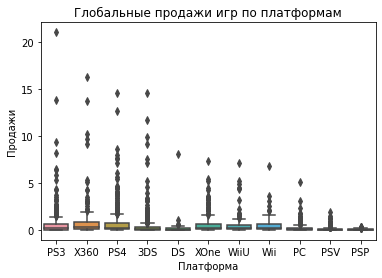

In [87]:
sns.boxplot(data=actual_period_data, x='platform', y='total_sales')
plt.title('Глобальные продажи игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()

In [88]:
# Комментарий ревьюера
temp = actual_period_data.copy()

In [89]:
# q1 = actual_period_data['total_sales'].quantile(0.25)
# q3 = actual_period_data['total_sales'].quantile(0.75)
# iqr = q3 - q1
# actual_period_data = actual_period_data[(actual_period_data['total_sales'] >= q1 - 1.5*iqr) & (actual_period_data['total_sales'] <= q3 + 1.5*iqr)]

In [90]:
# Комментарий ревьюера
temp1, temp2 = actual_period_data.total_sales.sum(), temp.total_sales.sum()
temp1, temp2, round((temp2-temp1)/temp2*100, 2)

(1446.5300000000002, 1446.5300000000002, 0.0)

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 А зачем фильтруем фильтруем продажи актуального периода более чем на 65%, тем самым искажая данные для построения диаграмм размаха. И строить диаграммы размаха следует в двух видах, одну со всеми выбросами, вторую масштабированную с крупными боксплотами. Для этого надо использовать параметр ylim().</font>
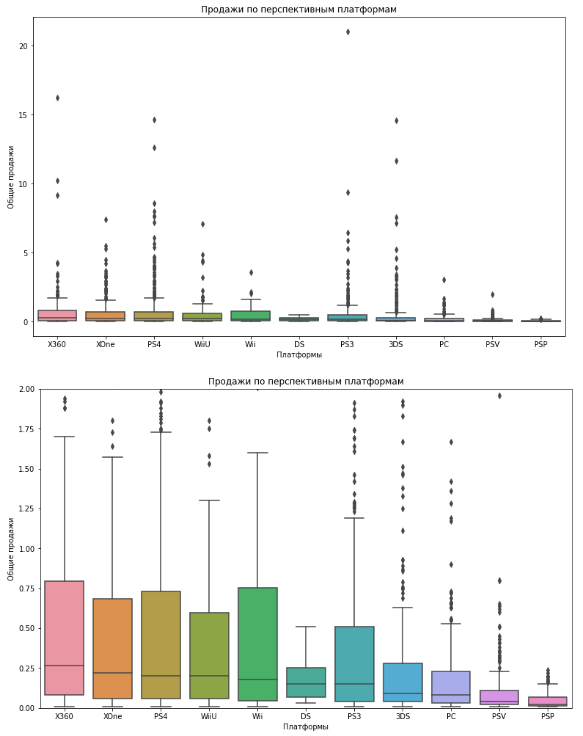

</font><font color='Blue'><b>Комментарий студента</b></font><br>
Ниже использовала параметр `ylim()`

In [91]:
# plt.figure(figsize=(12, 6))
# sns.boxplot(x='platform', y='total_sales', data=actual_period_data, whis=1.5)
# plt.title('Глобальные продажи игр по платформам')
# plt.xlabel('Платформа')
# plt.ylabel('Продажи')
# plt.show()

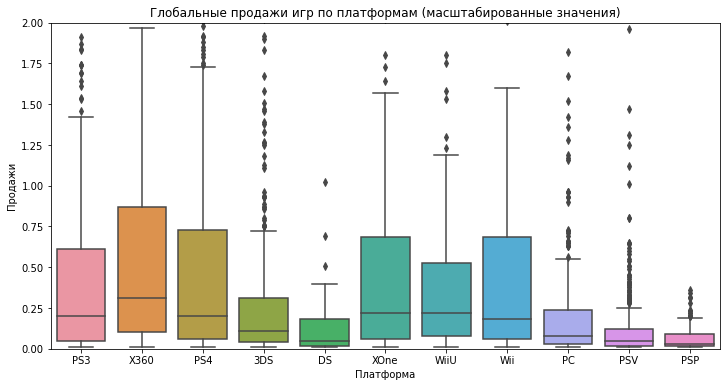

In [92]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='total_sales', data=actual_period_data, whis=1.5)
plt.title('Глобальные продажи игр по платформам (масштабированные значения)')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.ylim(0, 2)
plt.show()

In [93]:
platform_stats = actual_period_data.groupby('platform')['total_sales'].agg(['median', 'std'])
platform_stats = platform_stats.sort_values(by='median', ascending=False)
platform_stats


,median,std
platform,,
X360,0.31,1.712069
WiiU,0.22,1.058836
XOne,0.22,1.036139
PS4,0.20,1.609456
PS3,0.20,1.462855
Wii,0.18,1.165447
3DS,0.11,1.387161
PC,0.08,0.494640
DS,0.05,1.439245


- Разные платформы демонстрируют различные диапазоны и распределения глобальных продаж игр. 

- Разные платформы демонстрируют различные диапазоны и распределения глобальных продаж игр. Некоторые платформы, такие как `X360` и `WiiU`, имеют более высокие медианные продажи, но большой разброс значений, то есть могут быть более рискованными, но также могут иметь больший потенциал для роста.

- Наличие выбросов указывает на то, что есть некоторые игры, которые показали очень высокие или низкие продажи по сравнению с типичными значениями для их платформы.


<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 Для интерпретации диаграмм размаха помогает вспомнить, что означают боксплоты. В данном случае расположение боксплота и медианы показывают у какой платформы стабильно высокие продажи. Соответственно, Стримчик должен ориентироваться на такие платформы, так как какая игра в 2017 году выстрелит не известно.</font>
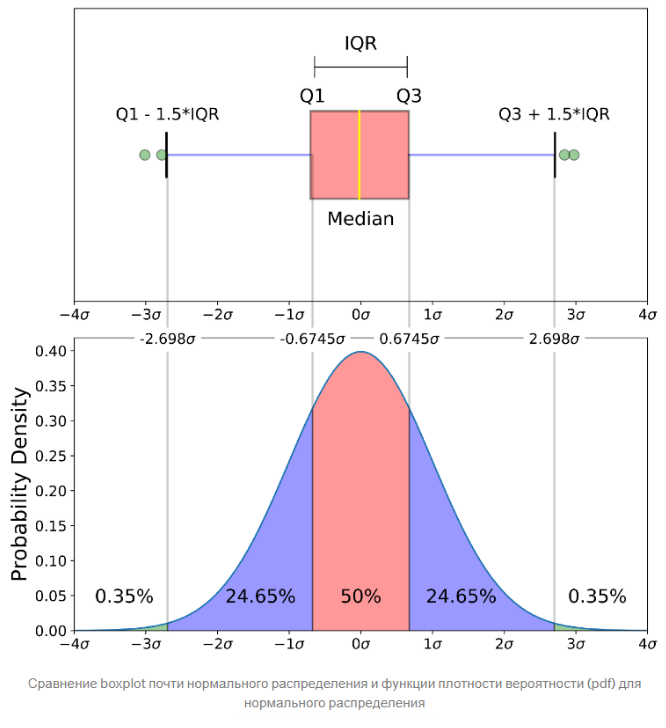

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Оформление проекта требует наличие названия подраздела.</font>

- ***Рассмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.***

Для начала необходимо определиться с популярными платформами

In [94]:
actual_period_data = data.query('year_of_release >= 2012')
actual_period_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,undefined,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,undefined,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79


In [95]:
popular_platforms = (
    actual_period_data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False).reset_index()['platform'].to_list()[:5]
)
popular_platforms

['PS4', 'PS3', 'X360', '3DS', 'XOne']

In [96]:
# for platform in popular_platforms:
#     plt.figure(figsize=(10, 8))
#     platform_data = actual_period_data[actual_period_data['platform'] == platform]
#     platform_data = platform_data[platform_data['user_score'] > -1]
    
#     # Строим корреляционную матрицу
#     corr_matrix = platform_data.corr()
    
#     # Визуализируем корреляционную матрицу
#     sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd', vmin=-1, vmax=1)
#     plt.title(f"Корреляционная матрица для платформы: {platform}")
#     plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 При анализе необходимо воздерживаться от вывода избыточных и не информативных данных. Какой аналитический смысл имеет корреляция между годом релиза и отзывами пользователей?</font>
<br><font color='Red'>🛠 А значения корреляции по отзывам критиков в данных матрицах не верные, так как не отфильтрованы заглушки.</font>

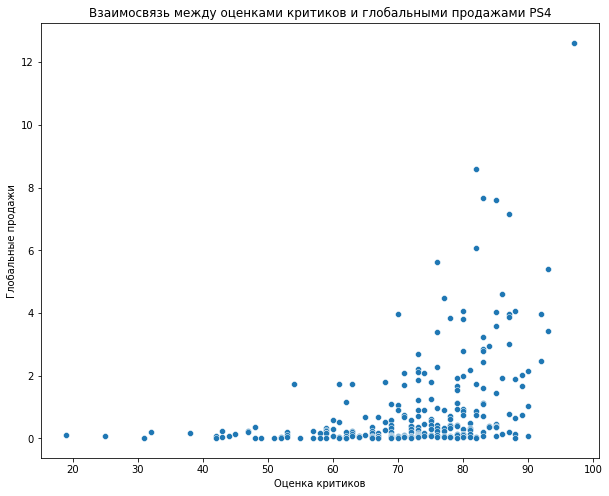

Корреляция между оценкой критиков и продажами на PS4: 0.41


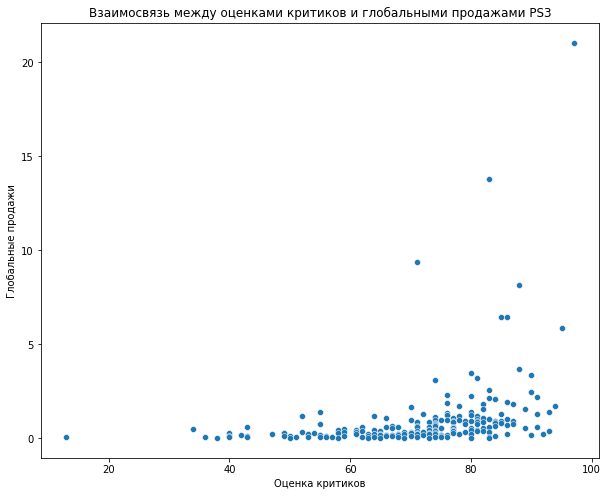

Корреляция между оценкой критиков и продажами на PS3: 0.33


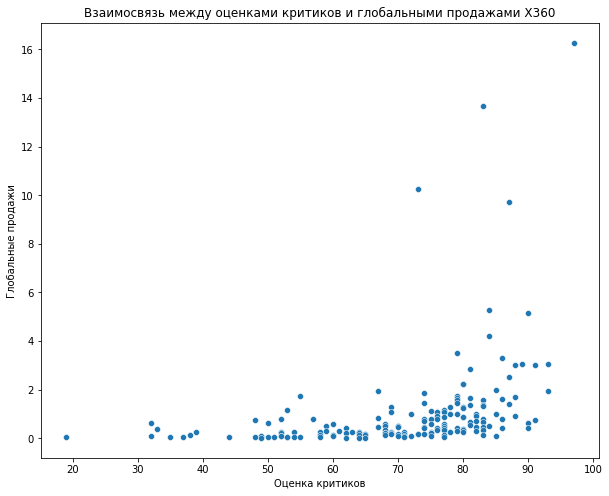

Корреляция между оценкой критиков и продажами на X360: 0.36


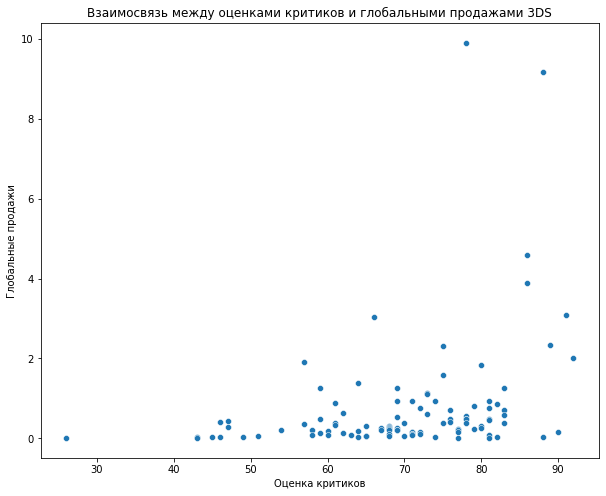

Корреляция между оценкой критиков и продажами на 3DS: 0.32


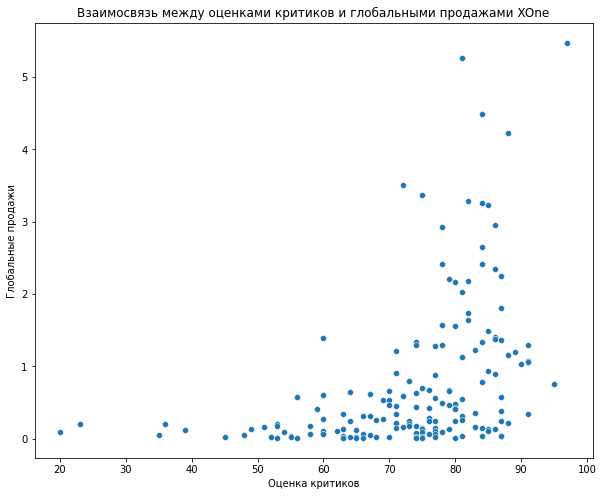

Корреляция между оценкой критиков и продажами на XOne: 0.42


In [97]:
for platform in popular_platforms:
    plt.figure(figsize=(10, 8))
    platform_data = actual_period_data[actual_period_data['platform'] == platform]
    platform_data = platform_data[platform_data['critic_score'] > -1]
    
    sns.scatterplot(x='critic_score', y='total_sales', data=platform_data)
    plt.xlabel('Оценка критиков')
    plt.ylabel('Глобальные продажи')
    plt.title(f'Взаимосвязь между оценками критиков и глобальными продажами {platform}')
    plt.show()

    
    critic_corr = platform_data['critic_score'].corr(platform_data['total_sales'])
    

    
    print(f"Корреляция между оценкой критиков и продажами на {platform}: {critic_corr:.2f}")
    

    

<Figure size 720x576 with 0 Axes>

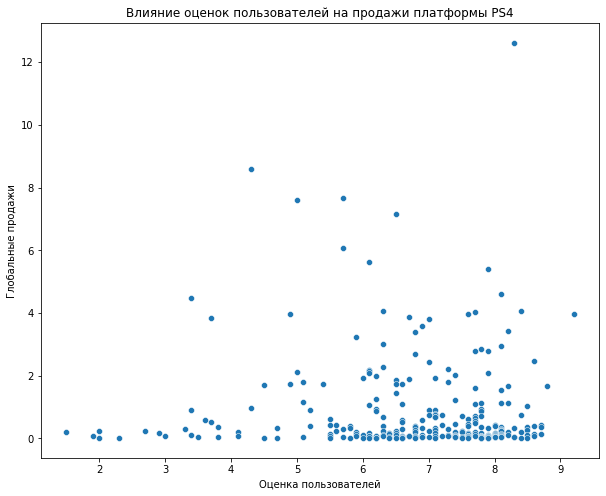

Корреляция между оценкой пользователей и продажами на PS4: -0.03


<Figure size 720x576 with 0 Axes>

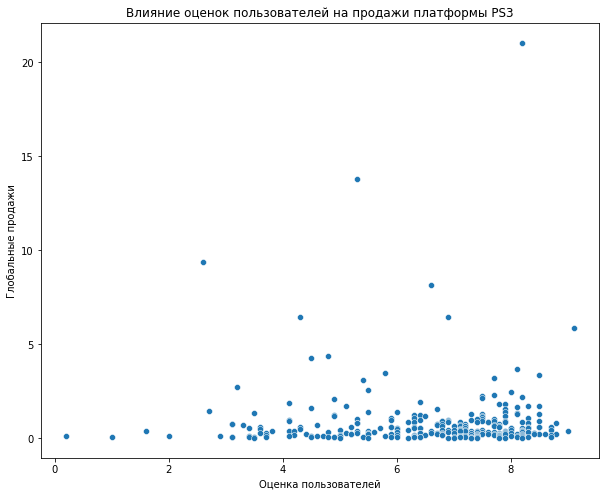

Корреляция между оценкой пользователей и продажами на PS3: -0.01


<Figure size 720x576 with 0 Axes>

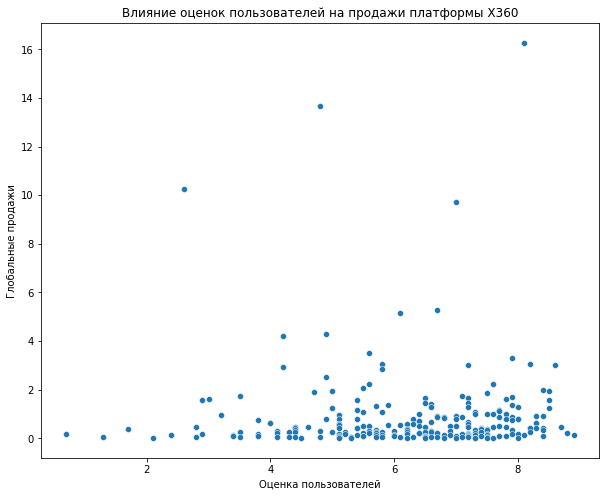

Корреляция между оценкой пользователей и продажами на X360: 0.01


<Figure size 720x576 with 0 Axes>

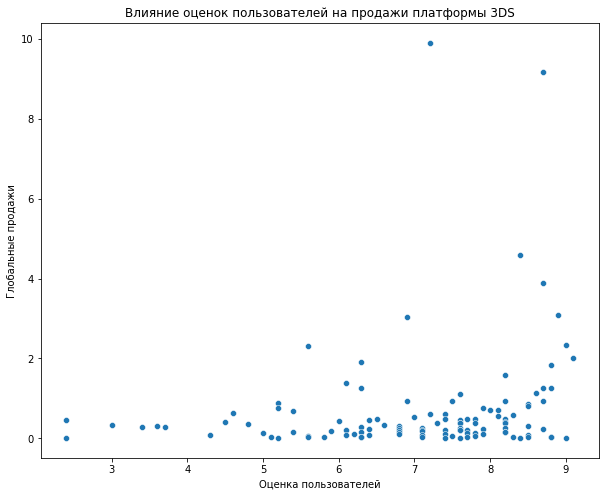

Корреляция между оценкой пользователей и продажами на 3DS: 0.20


<Figure size 720x576 with 0 Axes>

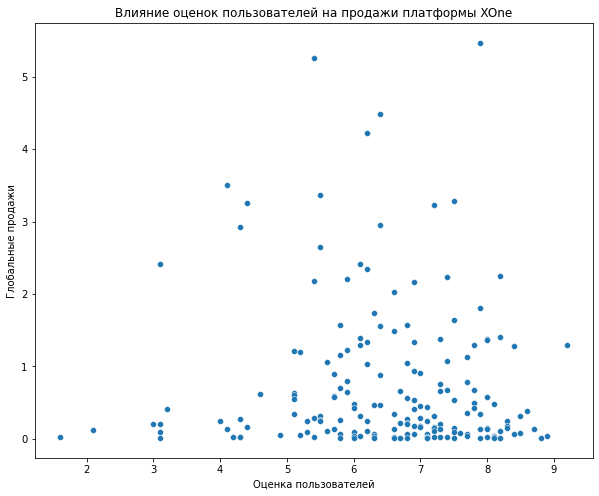

Корреляция между оценкой пользователей и продажами на XOne: -0.07


In [98]:
for platform in popular_platforms:
    plt.figure(figsize=(10, 8))
    platform_data = actual_period_data[actual_period_data['platform'] == platform]
    platform_data = platform_data[platform_data['user_score'] > -1]
    
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='user_score', y='total_sales', data=platform_data)
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Глобальные продажи')
    plt.title(f'Влияние оценок пользователей на продажи платформы {platform}')
    plt.show()
    
    user_corr = platform_data['user_score'].corr(platform_data['total_sales'])
    
    print(f"Корреляция между оценкой пользователей и продажами на {platform}: {user_corr:.2f}")

Исходя из построенных графиков, можно сделать следующие выводы:
- На платформе `PS4` наблюдается умеренная положительная корреляция между оценками критиков и продажами. Это означает, что игры с более высокими оценками критиков, как правило, продаются лучше. Корреляция между оценкой пользователей и продажами на `PS4` наблюдается слабая отрицательная. Это может говорить о том, что отзывы пользователей не оказывают значительного влияния на продажи игр на этой платформе.
- На платформах `X360`, `3DS`, `XOne` наблюдается слабая корреляция между оценками критиков и продажами, а также пользователей и продажами. Это означает, что отзывы критиков и пользователей не оказывают значительного влияния на продажи игр на этой платформе. 

In [99]:
# plt.figure(figsize=(10, 8))
# platform_data = actual_period_data[actual_period_data['platform'] == platform]
# platform_data = platform_data[platform_data['user_score'] > -1]
# #platform_data = platform_data[platform_data['critic_score'] > -1]

# # Строим корреляционную матрицу
# corr_matrix = platform_data.corr()

# # Визуализируем корреляционную матрицу
# sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd', vmin=-1, vmax=1)
# plt.title(f"Корреляционная матрица")
# plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Тут аналогичная ошибка, расчет кореляции по отзывам критиков проводится без фильтрации заглушек. </font>

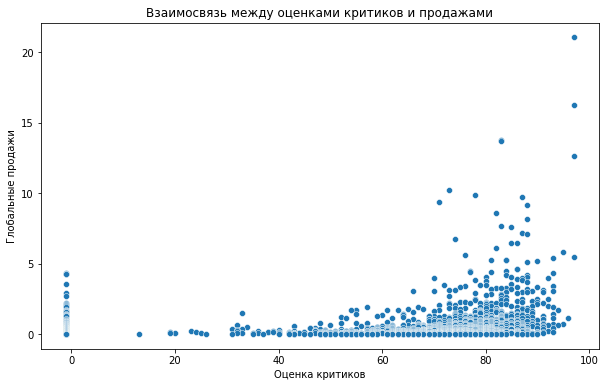

In [100]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=actual_period_data.query('user_score > -1'))
plt.xlabel('Оценка критиков')
plt.ylabel('Глобальные продажи')
plt.title('Взаимосвязь между оценками критиков и продажами')
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Не отфильтрована заглушка.</font>
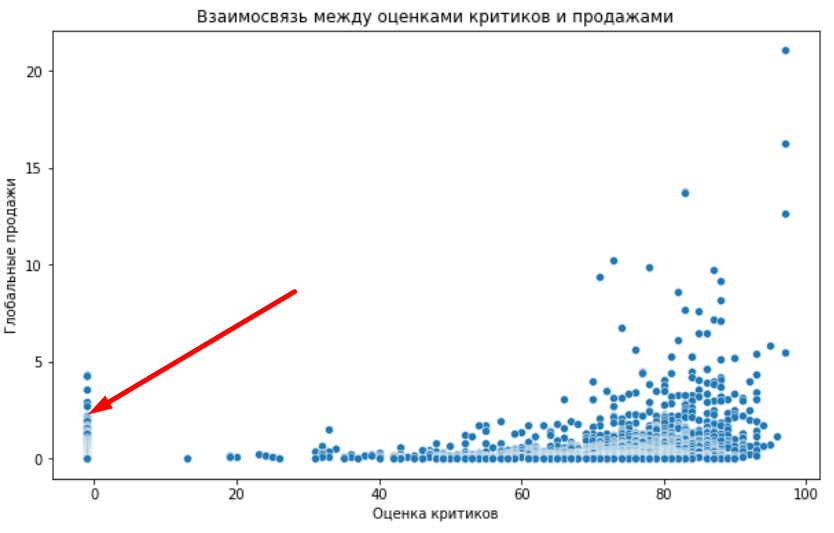

</font><font color='Blue'><b>Комментарий студента</b></font><br>
Фильтрация заглушки

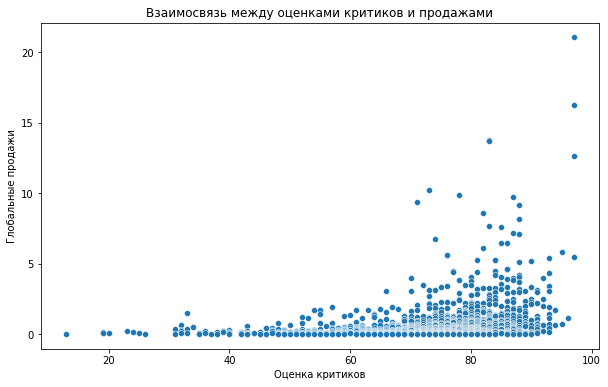

In [101]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=actual_period_data.query('critic_score > -1'))
plt.xlabel('Оценка критиков')
plt.ylabel('Глобальные продажи')
plt.title('Взаимосвязь между оценками критиков и продажами')
plt.show()

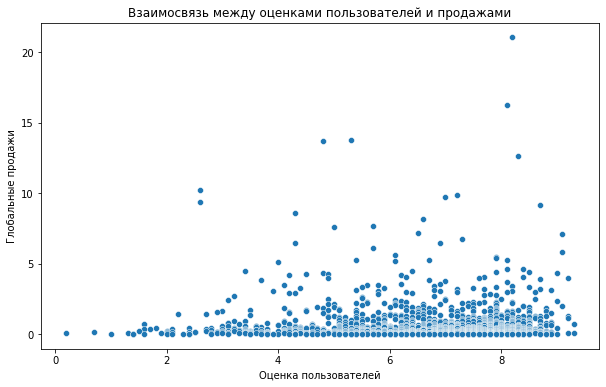

In [102]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='user_score', y='total_sales', data=actual_period_data.query('user_score > -1'))
plt.xlabel('Оценка пользователей')
plt.ylabel('Глобальные продажи')
plt.title('Взаимосвязь между оценками пользователей и продажами')
plt.show()

In [103]:
actual_period_data.query('user_score > -1')['user_score'].corr(actual_period_data['total_sales'])

0.0044288176754932575

Таким образом, общая корреляция между оценками пользователей и продажами составила 0.04, что говорит нам о том, что связь между этими двумя факторами очень слабая.

In [104]:
actual_period_data.query('critic_score > -1')['critic_score'].corr(actual_period_data['total_sales'])

0.3081967459207781

Общая корреляция между оценками критиков и продажами 0.3 говорит нам о том, что связь между этими двумя факторами умеренная и положительная.

Это означает, что существует умеренная тенденция к тому, что игры с более высокими оценками критиков продаются лучше. То есть, чем выше оценка критиков, тем больше вероятность того, что игра будет иметь хорошие продажи.
Однако, эта связь не является очень сильной. Это означает, что есть много других факторов, которые также влияют на продажи игр, помимо оценок критиков.

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Для оценки корреляции лучше пользоваться вот этой шкалой:</font>
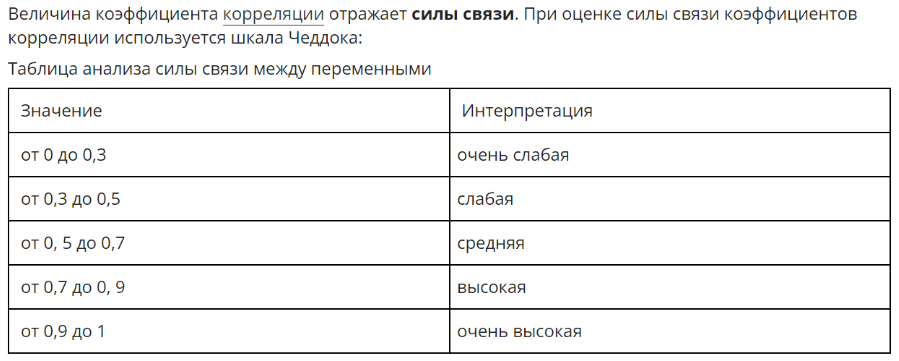

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Оформление проекта требует наличие названия подраздела.</font>

- ***Теперь рассмотрим общее распределение игр по жанрам.***

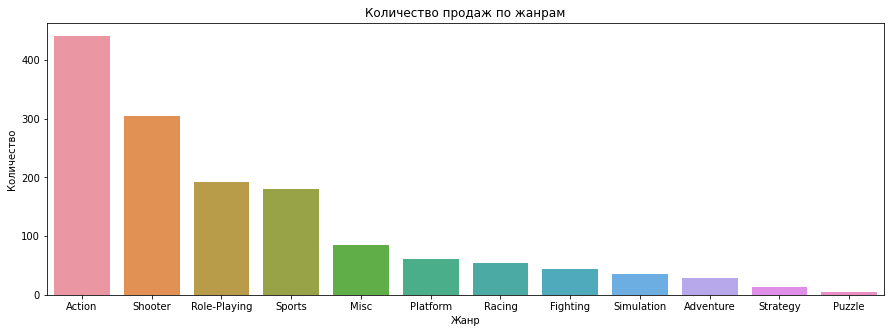

In [105]:
genre_sales = actual_period_data.pivot_table(index='genre', values='total_sales', aggfunc='sum')
genre_sales = genre_sales.sort_values(by='total_sales', ascending=False)

plt.figure(figsize=(15, 5))
sns.barplot(x=genre_sales.index, y='total_sales', data=genre_sales.reset_index())
plt.title('Количество продаж по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество')
plt.show()

Исходя из этой гистограммы можно сделать выводы:
- Доминирование экшена и шутеров: Жанры `Action` и `Shooter` явно лидируют по продажам, составляя почти 75% от общего объема продаж. Это говорит о том, что игры в этих жанрах пользуются огромной популярностью у геймеров.
- Популярность RPG и спортивных игр: Жанры `Role-Playing` и `Sports` также показывают значительные продажи, занимая третье и четвертое места. Это подтверждает, что RPG и спортивные игры - это стабильно популярные категории.
- Низкая популярность некоторых жанров: Жанры `Misc`, `Platform`, `Racing`, `Fighting`, `Simulation`, `Adventure`, `Strategy` и `Puzzle` имеют значительно меньшие продажи. Это может быть связано с тем, что эти жанры менее популярны у широкой аудитории или имеют более узкую целевую аудиторию.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Здесь попали в ловушку, что максимальные продажи являются самыми прибыльными. Но в данных продажи по жанру для разных платформ, и если одна платформа со своей одной игрой в данном жанре выстрелила, а остальные провалились, то все равно будет виден максимум общих продаж. Но для прибыльности нужны стабильные жанры, который приносят доход не зависимо от платформы, значит на этот жанр есть устойчивый спрос.</font><br>
<font color='Red'>🛠 По этому лучше добавить сравнение медианных продаж, проиллюстрировав их диаграммами размаха и изменить промежуточные выводы.</font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>
Добавление сравнения медианных продаж. Проиллюстрируем их диаграммами размаха.

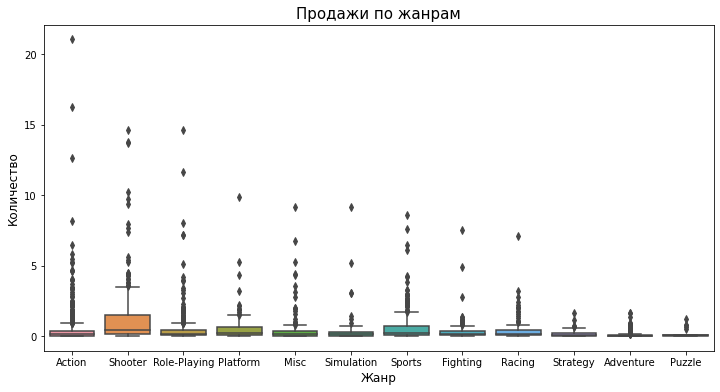

In [106]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(data=actual_period_data, x='genre', y='total_sales')
plt.title('Продажи по жанрам', fontsize=15)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Количество',fontsize=12)
plt.show()

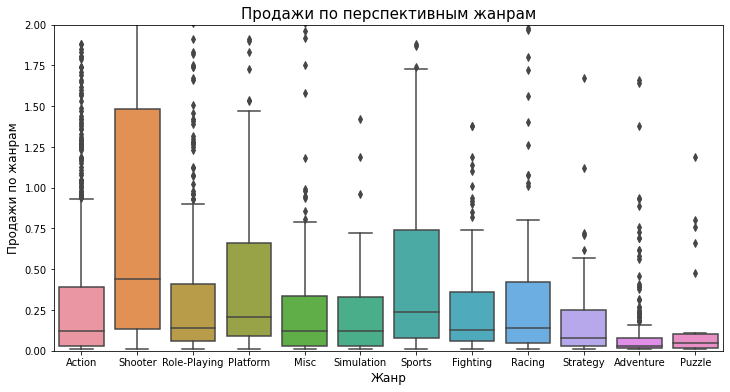

In [107]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(data=actual_period_data, x='genre', y='total_sales')
plt.title('Продажи по перспективным жанрам', fontsize=15)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Продажи по жанрам',fontsize=12)
plt.ylim(0, 2)
plt.show()

Анализ продаж за последние четыре года показывает, что жанры `Action` и `Shooter` пользуются наибольшим спросом. Однако, углубленное исследование и сравнение медианных значений продаж по жанрам выявило, что жанры `Shooter` и `Sports` демонстрируют более стабильную прибыльность, что делает их более привлекательными для инвестирования.

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 В проекте под "прибыльностью" понимается наличие устойчивого спроса пользователей на данный жанр. Можно сделать уникальный сюжет, быстрый движок, красивую графику и вложить немеряно денег в рекламу и продажи игры подпрыгнут. Но нам лучше выбирать игру из жанра, на которой есть постоянный спрос независимо от маркетинговых усилий производителей игр.<br>
Это хороший пример, когда на одних и тех же данных разные диаграммы дают разный анализ. Визуализация это не только красивое представление табличных данных, а еще и инструмент анализа.</font>

**Вывод**

- Большая часть игр выпускалась в 2008-2009 годах. Дальше продажи пошли на спад. Если смотреть на начало графика, то можно увидеть, что игры стали покупать в большом количестве в 2000-х, поэтому информация за 1980 - 1999 годы не важна.
- Большое количество игр покупали у платформ PS2, X360, PS3, Wii, DS, PS. Далее заметен резкий спад продаж у других платформ
- Жизненный цикл игровых платформ составляет в среднем 7 лет.
- Выяснили, что актуальным периодом для прогноза будет 4 года
- Выяснили, что по продажам лидируют платформы PS4, PS3, X360. 
- У всех платформ продажи к 2016 году падают, однако у PS4 и XOne продажи выше остальных.
- Разные платформы демонстрируют различные диапазоны и распределения глобальных продаж игр.
- Разные платформы демонстрируют различные диапазоны и распределения глобальных продаж игр. Некоторые платформы, такие как X360 и WiiU, имеют более высокие медианные продажи, но большой разброс значений, то есть могут быть более рискованными, но также могут иметь больший потенциал для роста.
- Наличие выбросов указывает на то, что есть некоторые игры, которые показали очень высокие или низкие продажи по сравнению с типичными значениями для их платформы.
- На платформе PS4 наблюдается умеренная положительная корреляция между оценками критиков и продажами. Это означает, что игры с более высокими оценками критиков, как правило, продаются лучше. Корреляция между оценкой пользователей и продажами на PS4 наблюдается слабая отрицательная. Это может говорить о том, что отзывы пользователей не оказывают значительного влияния на продажи игр на этой платформе.
- На платформах X360, 3DS, XOne наблюдается слабая корреляция между оценками критиков и продажами, а также пользователей и продажами. Это означает, что отзывы критиков и пользователей не оказывают значительного влияния на продажи игр на этой платформе.
- Общая корреляция между оценками пользователей и продажами составила 0.04, что говорит нам о том, что связь между этими двумя факторами очень слабая.
- Общая корреляция между оценками критиков и продажами 0.3 говорит нам о том, что связь между этими двумя факторами умеренная и положительная.
- Это означает, что существует умеренная тенденция к тому, что игры с более высокими оценками критиков продаются лучше. То есть, чем выше оценка критиков, тем больше вероятность того, что игра будет иметь хорошие продажи. Однако, эта связь не является очень сильной. Это означает, что есть много других факторов, которые также влияют на продажи игр, помимо оценок критиков.
- Анализ продаж за последние четыре года показывает, что жанры `Action` и `Shooter` пользуются наибольшим спросом. Однако, углубленное исследование и сравнение медианных значений продаж по жанрам выявило, что жанры `Shooter` и `Sports` демонстрируют более стабильную прибыльность, что делает их более привлекательными для инвестирования.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Оформление проекта требует наличие названия подраздела.</font>

**Портрет пользователя каждого региона**

In [108]:
actual_period_data


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,undefined,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,undefined,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,undefined,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1,-1.0,undefined,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,undefined,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,undefined,0.01


In [109]:
sales_data = actual_period_data

# Анализ платформ
def analyze_platforms(sales, region):
    """Анализирует популярность платформ."""
    platform_sales = sales.groupby('platform').sum()
    top_platforms = platform_sales.sort_values(by=region, ascending=False).head(5)
    print("Топ-5 платформ по продажам:")
    return top_platforms

# Анализ жанров
def analyze_genres(sales, region):
    """Анализирует популярность жанров в заданном регионе."""
    genre_sales = sales.groupby('genre').sum()
    top_genres = genre_sales.sort_values(by=region, ascending=False).head(5)
    print(f"Топ-5 жанров в {region}:")
    return top_genres

# Анализ влияния рейтинга ESRB
def analyze_esrb(sales, region):
    """Анализирует влияние рейтинга ESRB на продажи в заданном регионе."""
    esrb_sales = sales.groupby('rating')[region].sum()
    print(f"Продажи по рейтингу ESRB в {region}:")
    return esrb_sales




**Самые популярные платформы в Северной Америке (NA)**

In [110]:
top_platform_na = analyze_platforms(sales_data, 'na_sales')
top_platform_na


Топ-5 платформ по продажам:


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
platform,,,,,,,,
X360,587862,140.05,74.52,1.57,20.40,11998,1393.9,236.54
PS4,789937,108.74,141.09,15.96,48.35,18027,1593.3,314.14
PS3,992629,103.38,106.86,35.29,43.26,15036,1612.8,288.79
XOne,497693,93.12,51.59,0.34,14.27,12314,1110.9,159.32
3DS,797445,55.31,42.64,87.79,8.87,6969,490.8,194.61


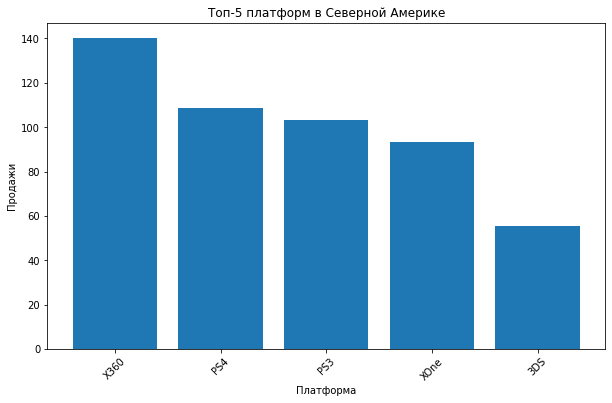

In [111]:
top_platforms = sales_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False)

top_platforms = top_platforms.head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_platforms.index, top_platforms)
plt.title(f"Топ-5 платформ в Северной Америке")
plt.xlabel("Платформа")
plt.ylabel("Продажи")
plt.xticks(rotation=45)
plt.show()

**Самые популярные платформы в Европе (EU)**

In [112]:
top_platform_eu = analyze_platforms(sales_data, 'eu_sales')
top_platform_eu

Топ-5 платформ по продажам:


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
platform,,,,,,,,
PS4,789937,108.74,141.09,15.96,48.35,18027,1593.3,314.14
PS3,992629,103.38,106.86,35.29,43.26,15036,1612.8,288.79
X360,587862,140.05,74.52,1.57,20.40,11998,1393.9,236.54
XOne,497693,93.12,51.59,0.34,14.27,12314,1110.9,159.32
3DS,797445,55.31,42.64,87.79,8.87,6969,490.8,194.61


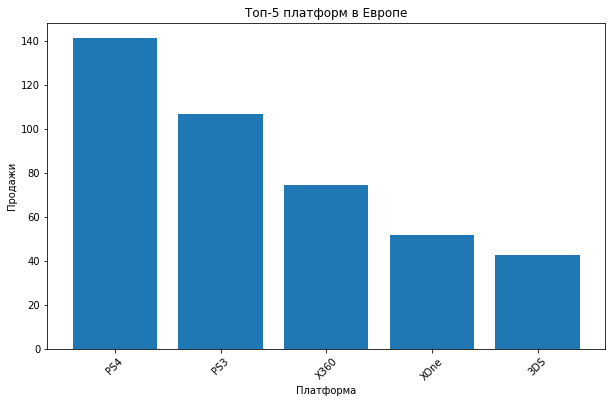

In [113]:
top_platforms = sales_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)

top_platforms = top_platforms.head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_platforms.index, top_platforms)
plt.title(f"Топ-5 платформ в Европе")
plt.xlabel("Платформа")
plt.ylabel("Продажи")
plt.xticks(rotation=45)
plt.show()

**Самые популярные платформы в Японии (JP)**

In [114]:
top_platform_jp = analyze_platforms(sales_data, 'jp_sales')
top_platform_jp

Топ-5 платформ по продажам:


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
platform,,,,,,,,
3DS,797445,55.31,42.64,87.79,8.87,6969,490.8,194.61
PS3,992629,103.38,106.86,35.29,43.26,15036,1612.8,288.79
PSV,827865,10.98,11.36,21.04,5.80,7328,675.3,49.18
PS4,789937,108.74,141.09,15.96,48.35,18027,1593.3,314.14
WiiU,296008,38.10,25.13,13.01,5.95,6309,638.4,82.19


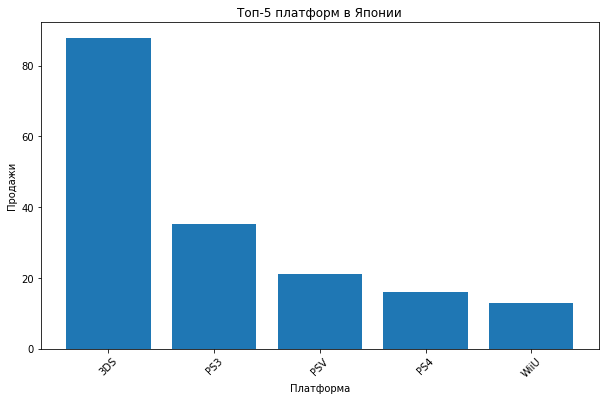

In [115]:
top_platforms = sales_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)

top_platforms = top_platforms.head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_platforms.index, top_platforms)
plt.title(f"Топ-5 платформ в Японии")
plt.xlabel("Платформа")
plt.ylabel("Продажи")
plt.xticks(rotation=45)
plt.show()

Исходя из этих данных можно сделать вывод, что в Северной Америке большой популярностью пользуются платформы `X360`, `PS4`, `PS3`. В Европе первую тройку занимают те же платформы, только немного в другом порядке. В Японии первую позицию занимает платформа `3DS`, которая в Европе и Северной Америке занимала последнее место.

**Самые популярные жанры в Северной Америке**

In [116]:
top_genre_na = analyze_genres(sales_data, 'na_sales')
top_genre_na

Топ-5 жанров в na_sales:


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
genre,,,,,,,,
Action,2076366,177.84,159.34,52.80,51.14,30526,3013.5,441.12
Shooter,473263,144.77,113.47,9.23,37.26,12640,1208.0,304.73
Sports,539746,81.53,69.09,8.01,22.44,10299,971.9,181.07
Role-Playing,745139,64.00,48.53,65.44,14.83,11552,1042.2,192.80
Misc,386675,38.19,26.32,12.86,7.67,4015,320.9,85.04


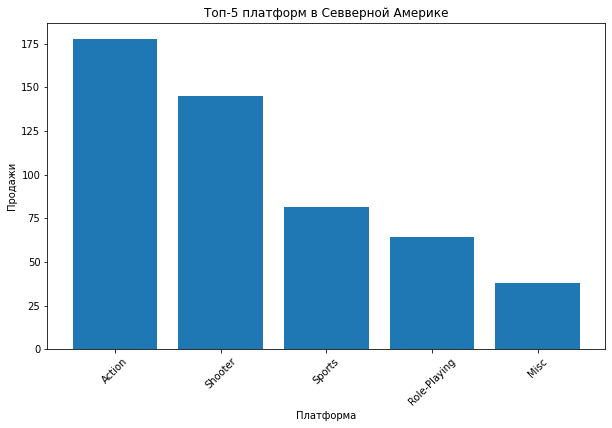

In [117]:
top_platforms = sales_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False)

top_platforms = top_platforms.head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_platforms.index, top_platforms)
plt.title(f"Топ-5 платформ в Севверной Америке")
plt.xlabel("Платформа")
plt.ylabel("Продажи")
plt.xticks(rotation=45)
plt.show()

**Самые популярные жанры в Европе**

In [118]:
top_genre_eu = analyze_genres(sales_data, 'eu_sales')
top_genre_eu


Топ-5 жанров в eu_sales:


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
genre,,,,,,,,
Action,2076366,177.84,159.34,52.80,51.14,30526,3013.5,441.12
Shooter,473263,144.77,113.47,9.23,37.26,12640,1208.0,304.73
Sports,539746,81.53,69.09,8.01,22.44,10299,971.9,181.07
Role-Playing,745139,64.00,48.53,65.44,14.83,11552,1042.2,192.80
Racing,231600,17.22,27.29,2.50,6.49,5787,497.0,53.50


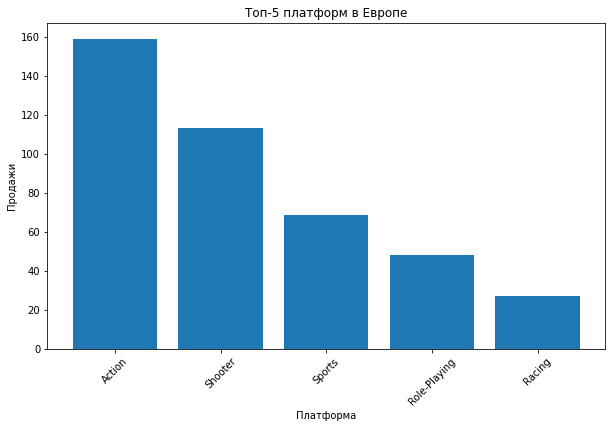

In [119]:
top_platforms = sales_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)

top_platforms = top_platforms.head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_platforms.index, top_platforms)
plt.title(f"Топ-5 платформ в Европе")
plt.xlabel("Платформа")
plt.ylabel("Продажи")
plt.xticks(rotation=45)
plt.show()

**Самые популярные жанры в Японии**

In [120]:
top_genre_jp = analyze_genres(sales_data, 'jp_sales')
top_genre_jp


Топ-5 жанров в jp_sales:


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
genre,,,,,,,,
Role-Playing,745139,64.00,48.53,65.44,14.83,11552,1042.2,192.80
Action,2076366,177.84,159.34,52.80,51.14,30526,3013.5,441.12
Misc,386675,38.19,26.32,12.86,7.67,4015,320.9,85.04
Simulation,161117,7.97,14.55,10.41,2.19,2557,229.5,35.12
Fighting,219501,19.79,10.79,9.44,4.47,4461,440.7,44.49


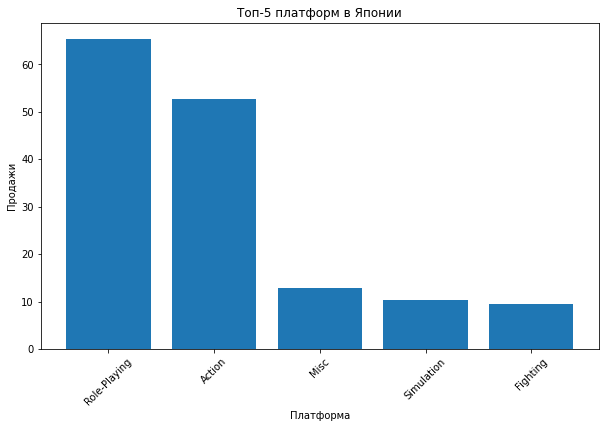

In [121]:
top_platforms = sales_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)

top_platforms = top_platforms.head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_platforms.index, top_platforms)
plt.title(f"Топ-5 платформ в Японии")
plt.xlabel("Платформа")
plt.ylabel("Продажи")
plt.xticks(rotation=45)
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 В задании просят сделать анализ по топ-5. И лучше визуализировать круговой диаграммой, только продажи платформ/жанров не вошедших в топ, собрать в одной группе, например "Другие", и по платформам, и по жанрам. Тогда на круговых диаграммах хорошо видны все региональные рынки игр с разбиением на платформы/жанры. Какая платформа/жанр занимает какую долю рынка. Тогда визуализация несет определенную бизнес-логику, связанную именно с долями рынка занимаемыми платформами/жанрами. А этого не дают другие виды диаграмм. Примерно вот так:</font>
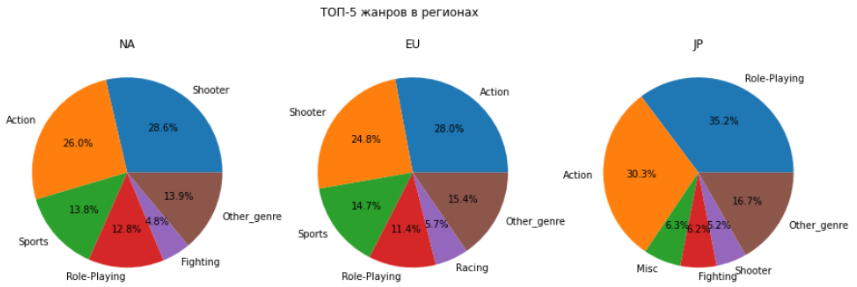

</font><font color='Blue'><b>Комментарий студента</b></font><br>
Использование круговых диаграмм для визуализации

In [122]:
import pandas as pd

def process_region_sales(df, region_column):
    """
    Обрабатывает данные о продажах по жанрам в указанном регионе.

    Args:
        df (pd.DataFrame): DataFrame с данными о продажах.
        region_column (str): Название столбца с продажами региона.

    Returns:
        pd.DataFrame: DataFrame с агрегированными данными о продажах по жанрам.
    """

    region_sales = (
        df
        .pivot_table(index=['genre'], values=[region_column], aggfunc='sum')
        .sort_values(region_column, ascending=False)
        .reset_index()
    )

    region_sales.loc[5:, 'genre'] = 'Other'
    region_sales.loc[5, region_column] = region_sales.loc[5:, region_column].sum().round(2)
    region_sales = region_sales.iloc[0:6, :]

    return region_sales


na_sales = process_region_sales(actual_period_data, 'na_sales')
eu_sales = process_region_sales(actual_period_data, 'eu_sales')
jp_sales = process_region_sales(actual_period_data, 'jp_sales')
na_sales

,genre,na_sales
0,Action,177.84
1,Shooter,144.77
2,Sports,81.53
3,Role-Playing,64.00
4,Misc,38.19
5,Other,84.64


In [123]:
gs = pd.merge(na_sales, eu_sales, left_index=True, right_index=True)
gs = pd.merge(gs, jp_sales, left_index=True, right_index=True)
gs.rename(columns = {'genre_x':'na_genre', 'genre_y':'eu_genre', 'genre':'jp_genre'}, inplace = True )

gs

,na_genre,na_sales,eu_genre,eu_sales,jp_genre,jp_sales
0,Action,177.84,Action,159.34,Role-Playing,65.44
1,Shooter,144.77,Shooter,113.47,Action,52.80
2,Sports,81.53,Sports,69.09,Misc,12.86
3,Role-Playing,64.00,Role-Playing,48.53,Simulation,10.41
4,Misc,38.19,Racing,27.29,Fighting,9.44
5,Other,84.64,Other,89.10,Other,41.63


In [124]:
data = {'region': ['NA - Америка', 'EU - Европа', 'JP - Япония'], 'genre': ['na_genre', 'eu_genre', 'jp_genre'], 'sales': ['na_sales', 'eu_sales', 'jp_sales']} 
regions = pd.DataFrame(data) 
regions

,region,genre,sales
0,NA - Америка,na_genre,na_sales
1,EU - Европа,eu_genre,eu_sales
2,JP - Япония,jp_genre,jp_sales


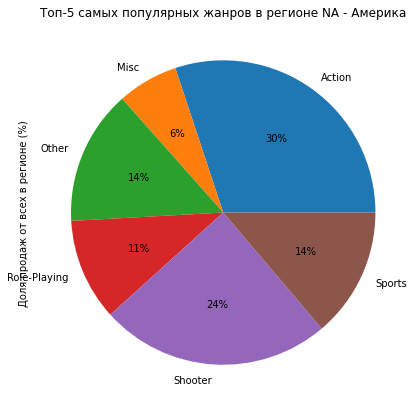

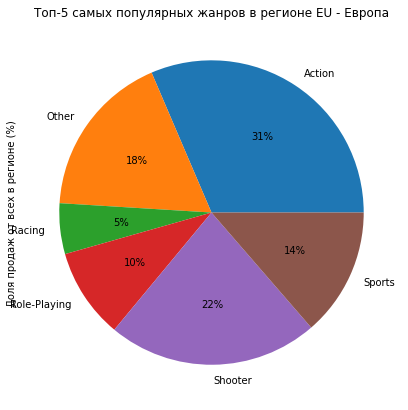

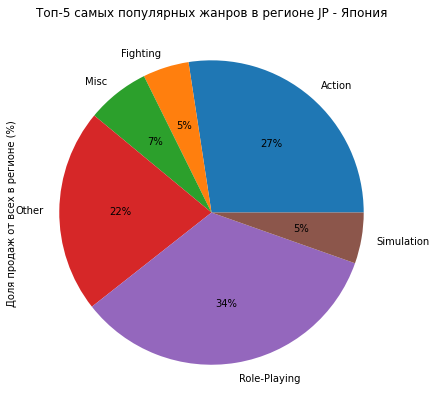

In [125]:
for i in regions.index :
    name = regions['region'][i]
    (gs.pivot_table(index=regions['genre'][i], values=regions['sales'][i], aggfunc='sum')
     .plot(kind='pie', y=regions['sales'][i], autopct='%1.0f%%', figsize=(7, 7), legend=False)
     .set(ylabel='Доля продаж от всех в регионе (%)')
    )
    plt.title(f'Топ-5 самых популярных жанров в регионе {name}')
    plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Если бы использовали `plt.subplots()`, то можно было разместить круговые диаграммы в один ряд. Тогда была более наглядная разница между регионами.</font>

Исходя из полученных данных можно сделать вывод, что самые популярные жанры в Северной Америке и Европе почти совпадают, а именно: первые места занимают экшн, шутеры, спортивные и ролевые игры. Что касается Японии, то здесь первые места занимают ролевые и экшн игры.

**Влиение рейтинга ESRB в Северной Америке**

In [126]:
esrb_na = analyze_esrb(sales_data, 'na_sales')
esrb_na.sort_values(ascending=False)

Продажи по рейтингу ESRB в na_sales:


rating
M            231.57
E            114.37
undefined    103.31
E10+          75.70
T             66.02
Name: na_sales, dtype: float64

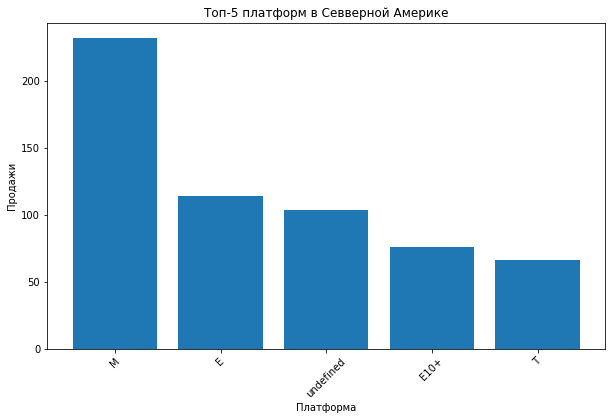

In [127]:
top_platforms = sales_data.groupby('rating')['na_sales'].sum().sort_values(ascending=False)

top_platforms = top_platforms.head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_platforms.index, top_platforms)
plt.title(f"Топ-5 платформ в Севверной Америке")
plt.xlabel("Платформа")
plt.ylabel("Продажи")
plt.xticks(rotation=45)
plt.show()

**Влиение рейтинга ESRB в Европе**

In [128]:
esrb_eu = analyze_esrb(sales_data, 'eu_sales')
esrb_eu.sort_values(ascending=False)

Продажи по рейтингу ESRB в eu_sales:


rating
M            193.96
E            113.03
undefined     91.50
E10+          55.37
T             52.96
Name: eu_sales, dtype: float64

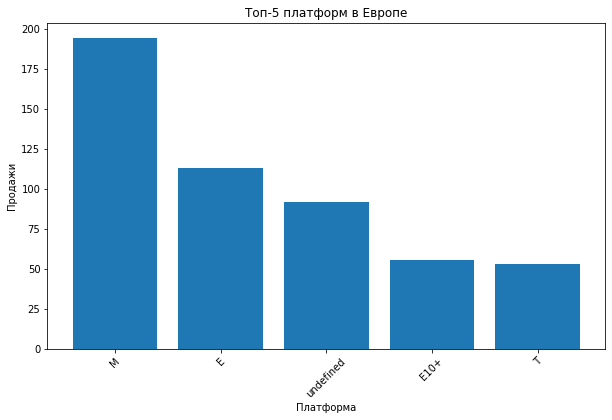

In [129]:
top_platforms = sales_data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)

top_platforms = top_platforms.head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_platforms.index, top_platforms)
plt.title(f"Топ-5 платформ в Европе")
plt.xlabel("Платформа")
plt.ylabel("Продажи")
plt.xticks(rotation=45)
plt.show()

**Влиение рейтинга ESRB в Японии**

In [130]:
esrb_jp = analyze_esrb(sales_data, 'jp_sales')
esrb_jp.sort_values(ascending=False)


Продажи по рейтингу ESRB в jp_sales:


rating
undefined    108.84
E             28.33
T             26.02
M             21.20
E10+           8.19
Name: jp_sales, dtype: float64

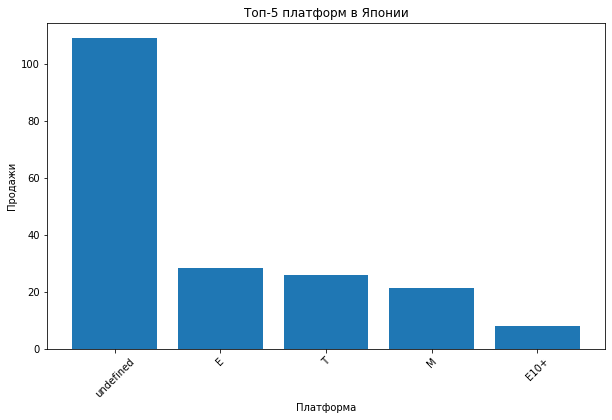

In [131]:
top_platforms = sales_data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

top_platforms = top_platforms.head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_platforms.index, top_platforms)
plt.title(f"Топ-5 платформ в Японии")
plt.xlabel("Платформа")
plt.ylabel("Продажи")
plt.xticks(rotation=45)
plt.show()

Исходя из этих данных можно сделать вывод, что в Северной Америке и Европе очень популярны игры с рейтингом `M`, что говорит о том, что большой популярностью пользуются игры для взрослых. Второе место занимают игры с рейтингом `E`, что говорит о значительном спросе на игры для всей семьи. Что касается Японии, то здесь первое место занимают игры с рейтингом `undefined`, что говорит нам о том, что японские стандарты классификации игр могут отличаться от ESRB.

**Вывод:**

- Исходя из данных можно сделать вывод, что в Северной Америке большой популярностью пользуются платформы X360, PS4, PS3. В Европе первую тройку занимают те же платформы, только немного в другом порядке. В Японии первую позицию занимает платформа 3DS, которая в Европе и Северной Америке занимала последнее место.
- Исходя из полученных данных можно сделать вывод, что самые популярные жанры в Северной Америке и Европе почти совпадают, а именно: первые места занимают экшн, шутеры, спортивные и ролевые игры. Что касается Японии, то здесь первые места занимают ролевые и экшн игры.
- Исходя из этих данных можно сделать вывод, что в Северной Америке и Европе очень популярны игры с рейтингом M, что говорит о том, что большой популярностью пользуются игры для взрослых. Второе место занимают игры с рейтингом E, что говорит о значительном спросе на игры для всей семьи. Что касается Японии, то здесь первое место занимают игры с рейтингом undefined, что говорит нам о том, что японские стандарты классификации игр могут отличаться от ESRB.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Вот такая проблема была с рейтингом. <br>
Дело в том, что если посмотреть в инете, что из себя представляет рейтинг ESRB, то окажется, что он предназначен для маркировки игр для США и Канады. И логично, что для других регионов он не заполняется. А в Японии есть свой рейтинг, свой рейтинг есть в ЕС и отдельно в Германии, Австралии и т.д., но по ним в датасете нет данных. То есть, в данном случае пропуск имеет признак, что игра выпущена не в Северо-Американском регионе. Необходимо шире смотреть на исходный датасет, так как за цифрами находятся реальные бизнес-процессы. Это необходимо учитывать при предобработке данных.</font>

**Проверка гипотез**
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

    a) Формулировка гипотез:

- Нулевая гипотеза (H0): Средний пользовательский рейтинг Xbox One равен среднему пользовательскому рейтингу PC.
- Альтернативная гипотеза (H1): Средний пользовательский рейтинг Xbox One не равен среднему пользовательскому рейтингу PC.

    b) Выбор критерия:

- Критерий: t-критерий для двух выборок с независимыми наблюдениями.
- Обоснование: Мы сравниваем средние значения двух независимых групп (Xbox One и PC) с неизвестными дисперсиями.

    c) Пороговое значение alpha: alpha = 0.05 (стандартное значение для проверки гипотез).

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, правильно сформулированы гипотезы.</font>

In [132]:
xbox_one_ratings = sales_data[(sales_data['platform'] == 'XOne') & (sales_data['user_score'] > -1)]['user_score']
pc_ratings = sales_data[(sales_data['platform'] == 'PC') & (sales_data['user_score'] > -1)]['user_score']

t_statistic, p_value = st.ttest_ind(xbox_one_ratings, pc_ratings)

print(f"t-статистика: {t_statistic:.2f}")
print(f"p-значение: {p_value:.3f}")

alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средние пользовательские рейтинги Xbox One и PC отличаются.")
else:
    print("Не отвергаем нулевую гипотезу: средние пользовательские рейтинги Xbox One и PC не отличаются.")

t-статистика: 0.59
p-значение: 0.554
Не отвергаем нулевую гипотезу: средние пользовательские рейтинги Xbox One и PC не отличаются.


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что отфильтровали заглушки.</font><br>
<font color='DarkGreen'>👌 Правильно, что для тестирования гипотез использован двусторонний t-тест.</font>

На основании проведенного t-теста с пороговым значением alpha = 0.05, мы не отвергаем нулевую гипотезу. Это означает, что нет статистически значимых различий между средними пользовательскими рейтингами игр на платформах Xbox One и PC.

Полученные результаты указывают на то, что средние оценки пользователей для игр на Xbox One и PC вероятно, не отличаются друг от друга.

2. Средние пользовательские рейтинги жанров Action и Sports разные.

    a) Формулировка гипотез:

- Нулевая гипотеза (H0): Средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports.
- Альтернативная гипотеза (H1): Средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу жанра Sports.

    b) Выбор критерия:

- Критерий: t-критерий для двух выборок с независимыми наблюдениями.
- Обоснование: Мы сравниваем средние значения двух независимых групп (Action и Sports) с неизвестными дисперсиями.

    c) Пороговое значение alpha: alpha = 0.05 (стандартное значение для проверки гипотез).

In [133]:
action_ratings = sales_data[(sales_data['genre'] == 'Action') & (sales_data['user_score'] > -1)]['user_score']
sports_ratings = sales_data[(sales_data['genre'] == 'Sports') & (sales_data['user_score'] > -1)]['user_score']

t_statistic, p_value = st.ttest_ind(action_ratings, sports_ratings)

print(f"t-статистика: {t_statistic:.2f}")
print(f"p-значение: {p_value:.3f}")

alpha = 0.05 
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports отличаются.")
else:
    print("Не отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports не отличаются.")

t-статистика: 11.01
p-значение: 0.000
Отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports отличаются.


На основании проведенного t-теста с пороговым значением alpha = 0.05, мы отвергаем нулевую гипотезу. Это означает, что существуют статистически значимые различия между средними пользовательскими рейтингами игр в жанрах Action и Sports.

Полученные результаты указывают на то, что средние оценки пользователей для игр в жанре Action значительно отличаются от средних оценок для игр в жанре Sports. Вероятность получить наблюдаемые различия, если бы нулевая гипотеза была верна, крайне мала

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 Лучше было написать, что на имеющихся данных, на уровне значимости 5% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы.</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Было бы правильным показать дополнительно средние пользовательские рейтинги и по платформам, и по жанрам, как иллюстрации не противоречивости наших гипотез, используя метод `.mean()` для выборок.</font>

In [134]:
print(f"Средний рейтинг Xbox One: {xbox_one_ratings.mean():.2f}")
print(f"Средний рейтинг PC: {pc_ratings.mean():.2f}")

Средний рейтинг Xbox One: 6.52
Средний рейтинг PC: 6.43


In [135]:
print(f"Средний рейтинг Action: {action_ratings.mean():.2f}")
print(f"Средний рейтинг Sports: {sports_ratings.mean():.2f}")

Средний рейтинг Action: 6.83
Средний рейтинг Sports: 5.46


**Вывод:**

В процессе исследования данных о продажах игр, оценки пользователей и экспертов, жанрах и платформах, были отработаны принципы работы с данными по выявлению определяющих успешность игры закономерностях, выполнены следующие этапы и сделаны выводы:

1. **Изучили общую информацию о данных**

- Всего в таблице 16715 строк и 11 колонок в шести колонках имеются пропуски в данных
- Названия колонок имеют нарушение стилей
- Ряд колонок имеет неверный тип
- Данных достаточно для проведения исследования

2. **Предобработали данные**

- Явные дубликаты не обнаружены
- Удалены строки с неявными дубликатами поиск одновременно по `name`, `platform`, `year_of_release`
- По столбцу `name` удалены 2 строки с пропусками
- По столбцу `year_of_release` принято решение заменить строки с пропусками медианой
- В столбце `critic_score` количество пропусков достаточно большое, поэтому их обозначим как -1
- В столбце `user_score` количество пропусков достаточно большое, поэтому их обозначим как -1, неописанное значение tbd обозначено как -2
- В столбце `rating` пропуски обозначены как `undefined`
- Столбцы `year_of_release`, `critic_score` приведены к `int` типу, `user_score` к `float` в соответствии с данными содержащимися в них.
- Пропуски могли появиться из-за сбора данных из различных источников, которые не согласованы между собой.
- Посчитали суммарные продажи во всех регионах записали в total_sales

3. **Провели исследовательский анализ данных**

- Большая часть игр выпускалась в 2008-2009 годах. Дальше продажи пошли на спад. Если смотреть на начало графика, то можно увидеть, что игры стали покупать в большом количестве в 2000-х, поэтому информация за 1980 - 1999 годы не важна.
- Большое количество игр покупали у платформ PS2, X360, PS3, Wii, DS, PS. Далее заметен резкий спад продаж у других платформ
- Жизненный цикл игровых платформ составляет в среднем 7 лет.
- Выяснили, что актуальным периодом для прогноза будет 4 года
- Выяснили, что по продажам лидируют платформы PS4, PS3, X360. 
- У всех платформ продажи к 2016 году падают, однако у PS4 и XOne продажи выше остальных.
- Разные платформы демонстрируют различные диапазоны и распределения глобальных продаж игр.
- Разные платформы демонстрируют различные диапазоны и распределения глобальных продаж игр. Некоторые платформы, такие как X360 и WiiU, имеют более высокие медианные продажи, но большой разброс значений, то есть могут быть более рискованными, но также могут иметь больший потенциал для роста.
- Наличие выбросов указывает на то, что есть некоторые игры, которые показали очень высокие или низкие продажи по сравнению с типичными значениями для их платформы.
- На платформе PS4 наблюдается умеренная положительная корреляция между оценками критиков и продажами. Это означает, что игры с более высокими оценками критиков, как правило, продаются лучше. Корреляция между оценкой пользователей и продажами на PS4 наблюдается слабая отрицательная. Это может говорить о том, что отзывы пользователей не оказывают значительного влияния на продажи игр на этой платформе.
- На платформах X360, 3DS, XOne наблюдается слабая корреляция между оценками критиков и продажами, а также пользователей и продажами. Это означает, что отзывы критиков и пользователей не оказывают значительного влияния на продажи игр на этой платформе.
- Общая корреляция между оценками пользователей и продажами составила 0.04, что говорит нам о том, что связь между этими двумя факторами очень слабая.
- Общая корреляция между оценками критиков и продажами 0.3 говорит нам о том, что связь между этими двумя факторами умеренная и положительная.
- Это означает, что существует умеренная тенденция к тому, что игры с более высокими оценками критиков продаются лучше. То есть, чем выше оценка критиков, тем больше вероятность того, что игра будет иметь хорошие продажи. Однако, эта связь не является очень сильной. Это означает, что есть много других факторов, которые также влияют на продажи игр, помимо оценок критиков.
- Анализ продаж за последние четыре года показывает, что жанры `Action` и `Shooter` пользуются наибольшим спросом. Однако, углубленное исследование и сравнение медианных значений продаж по жанрам выявило, что жанры `Shooter` и `Sports` демонстрируют более стабильную прибыльность, что делает их более привлекательными для инвестирования.

4. **Портрет пользователя каждого региона**

- Исходя из данных можно сделать вывод, что в Северной Америке большой популярностью пользуются платформы X360, PS4, PS3. В Европе первую тройку занимают те же платформы, только немного в другом порядке. В Японии первую позицию занимает платформа 3DS, которая в Европе и Северной Америке занимала последнее место.
- Исходя из полученных данных можно сделать вывод, что самые популярные жанры в Северной Америке и Европе почти совпадают, а именно: первые места занимают экшн, шутеры, спортивные и ролевые игры. Что касается Японии, то здесь первые места занимают ролевые и экшн игры.
- Исходя из этих данных можно сделать вывод, что в Северной Америке и Европе очень популярны игры с рейтингом M, что говорит о том, что большой популярностью пользуются игры для взрослых. Второе место занимают игры с рейтингом E, что говорит о значительном спросе на игры для всей семьи. Что касается Японии, то здесь первое место занимают игры с рейтингом undefined, что говорит нам о том, что японские стандарты классификации игр могут отличаться от ESRB.

**Проверка гипотез**

- Нулевая гипотеза (H0): Средний пользовательский рейтинг Xbox One равен среднему пользовательскому рейтингу PC.

- Альтернативная гипотеза (H1): Средний пользовательский рейтинг Xbox One не равен среднему пользовательскому рейтингу PC.

На основании проведенного t-теста с пороговым значением alpha = 0.05, мы не отвергаем нулевую гипотезу. Это означает, что нет статистически значимых различий между средними пользовательскими рейтингами игр на платформах Xbox One и PC.

Полученные результаты указывают на то, что средние оценки пользователей для игр на Xbox One и PC вероятно, не отличаются друг от друга.


- Нулевая гипотеза (H0): Средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports.

- Альтернативная гипотеза (H1): Средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу жанра Sports.

На основании проведенного t-теста с пороговым значением alpha = 0.05, мы отвергаем нулевую гипотезу. Это означает, что существуют статистически значимые различия между средними пользовательскими рейтингами игр в жанрах Action и Sports.

Полученные результаты указывают на то, что средние оценки пользователей для игр в жанре Action значительно отличаются от средних оценок для игр в жанре Sports. Вероятность получить наблюдаемые различия, если бы нулевая гипотеза была верна, крайне мала

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Цель исследования понять, на что потратить рекламный бюджет. В исследовании проанализированы игры с разных сторон. Логично, что рекламный отдел ждет данные на какие платформы (1-2 штуки, на большее у нас не хватит рекламного бюджета), с каким жанром, с каким рейтингом ESRB и в каком регионе рекламировать. Стоит ли обращать внимание на отзывы или нет.<br>Вся информация в проекте уже есть, надо просто акцентировать на какие игры тратить рекламный бюджет. Дополним вывод?</font>

**Рекомендации:**

Исходя из полученных данных, для оптимизации рекламных расходов рекомендуется:

- Платформы:
    - PS4: Данная платформа демонстрирует наибольшие продажи и умеренную положительную корреляцию между оценками критиков и продажами.
    - XOne: Несмотря на меньшие продажи, чем у PS4, XOne демонстрирует стабильные продажи и средние пользовательские рейтинги, сопоставимые с PC.
- Жанры:
    - Shooter: Жанр демонстрирует стабильную прибыльность и высокую популярность в Северной Америке и Европе.
    - Sports: Жанр также демонстрирует стабильную прибыльность и высокую популярность в Северной Америке и Европе.
- Рейтинг ESRB:
    - M: Данный рейтинг пользуется наибольшей популярностью в Северной Америке и Европе.
- Регионы:
    - Северная Америка: Здесь наблюдается наибольший спрос на игры, особенно на платформы X360, PS4, PS3 и жанры Action, Shooter, Sports.
    - Европа: Популярны те же платформы и жанры, что и в Северной Америке.

<font color='DarkBlue'><b>Заключительный комментарий ревьюера</b></font><br><br>
<font color='DarkGreen'>👌 Диана, проект отлично структурирован и проработан.<br>Так держать и дальше!<br></font>
<font color='Red'>🛠 Что нужно, что бы сделать проект лучше:</font><br>
<font color='Red'>🛠 Переделать проект в соответствии с требованиями к оформлению проекта. Анализ проводить без фильтрации выбросов по продажам игр актуального периода. Переделать построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам. Раздельно отфильтровать заглушки при расчете корреляции в анализе отзывов. В анализе игр по жанрам надо проанализировать медианные значения продаж, построив диаграммы размаха.<br>Обращаю внимание, что после исправления ошибок необходимо будет откорректировать выводы анализа.</font><br>
<font color='DarkMagenta'>👉 При исправлении ошибок и недочетов будут приобретены дополнительный опыт и навыки!</font><br>
<font color='DarkGreen'>👌 Жду окончательный вариант! Успехов.</font>

<font color='DarkBlue'><b>Заключительный комментарий ревьюера 2</b></font><br><br>
<font color='DarkGreen'>👌 Диана! Удалось справиться со всеми подводными камнями в проекте.  Молодец! 😄<br>
Входе выполнения проекта узнали, что не все пропуски просто ошибки сбора данных, а несут свои признаки. Для этого понадобилось за данными датасета увидеть смысл этих данных и бизнес-процессы, которые за ними скрываются. Узнали, что медианы могут дать дополнительную информацию при анализе. Это новые знания и навыки, которые пригодятся в будущем!<br></font>
<font color='DarkGreen'>👌 Теперь, вперед за новыми знаниями и навыками! Удачи! 😉</font>